In [1]:
!pip install jyquickhelper
from jyquickhelper import add_notebook_menu   #pip install jyquickhelper
add_notebook_menu()

## Objectifs 

Le Machine Learning est une discipline qui utilise des algorithmes pour donner aux ordinateurs la capacité d’apprendre à partir de données et de faire des prédictions ou des classifications. Le langage R est largement utilisé dans le domaine du machine learning en raison de ses puissantes bibliothèques dédiées à la manipulation des données, la visualisation et la modélisation statistique.

L’objectif de ce cours est de vous montrer comment effectuer un projet de machine learning avec R, de la préparation des données à l’évaluation des modèles. Nous allons couvrir les étapes suivantes avec un dataset, tel que heartdisease, qui est utilisé pour prédire la présence de maladies cardiaques.

Cours :
L'objectif de cette séance est de réaliser un projet complet de machine learning sur la prédiction des maladies cardiaques. Le but est de passer par toutes les étapes nécessaires : de l'analyse des données jusqu'au déploiement du modèle. Nous allons explorer plusieurs techniques de classification et utiliser des outils d'évaluation pour mesurer les performances de nos modèles.

Conclusion :
À la fin de cette séance, vous serez en mesure de charger des données, de les analyser, de construire et d'évaluer des modèles de classification, puis de déployer ces modèles.

## Importer les bibliothèques d'analyse et de machine learning

In [6]:
import pandas as pd  #manipulation des donnees
import numpy as np   #calcul mathematiques
import seaborn as sns   #visualiser les données
import matplotlib.pyplot as plt  #visualisation
import scipy as scipy   # statistique decisionnelle: faire des statistques et des probabilités
import warnings         #gestion des avertissements
warnings.filterwarnings('ignore')

In [7]:
import sklearn  #premier librairie ML utilisé au Monde

Nous avons chargé les bibliothèques nécessaires pour manipuler les données, visualiser des graphiques et implémenter des algorithmes de machine learning.

## Charger ce dataset

In [10]:
fichier="HeartDiseaseUCI.csv"
data = pd.read_csv(fichier)

In [11]:
data.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


Nous utilisons un dataset qui contient des informations sur des patients, notamment des mesures médicales. La variable cible est binaire : elle indique si le patient a une maladie cardiaque (1) ou non (0).

In [13]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

C'est une base de donnees sur les maladies cardiaques, souvent référencé dans des études de machine learning, contient généralement des informations recueillies auprès de patients pour prédire la présence d'une maladie cardiaque. Voici une description des variables couramment trouvées dans de tels datasets :

1. **age** : L'âge du patient en années.
2. **sex** : Le sexe du patient (généralement codé comme 1 = homme, 0 = femme).
3. **cp** (chest pain type) : Type de douleur thoracique (valeurs typiques incluent 1 = angine typique, 2 = angine atypique, 3 = douleur non angineuse, 4 = asymptomatique).
4. **trestbps** (resting blood pressure) : La tension artérielle au repos en mm Hg (millimètres de mercure) lors de l'admission à l'hôpital.
5. **chol** (serum cholesterol) : Le cholestérol sérique en mg/dl (milligrammes par décilitre).
6. **fbs** (fasting blood sugar) : Le taux de sucre dans le sang à jeun > 120 mg/dl (1 = vrai ; 0 = faux).
7. **restecg** (resting electrocardiographic results) : Résultats de l'électrocardiogramme au repos (valeurs telles que 0 = normal, 1 = ayant des anomalies de l'onde ST-T, 2 = montrant une hypertrophie ventriculaire gauche probable ou définitive selon les critères d'Estes).
8. **thalach** (maximum heart rate achieved) : Fréquence cardiaque maximale atteinte.
9. **exang** (exercise induced angina) : Angine déclenchée par l'exercice (1 = oui ; 0 = non).
10. **oldpeak** (ST depression induced by exercise relative to rest) : Dépression du segment ST induite par l'exercice par rapport au repos.
11. **slope** (the slope of the peak exercise ST segment) : La pente du segment ST d'effort (valeurs telles que 1 = pente ascendante, 2 = plat, 3 = pente descendante).
12. **ca** (number of major vessels colored by flourosopy) : Nombre de vaisseaux principaux (0-3) colorés par fluoroscopie.
13. **thal** (thalassemia) : Une anomalie de l'hémoglobine (3 = normal ; 6 = défaut fixe ; 7 = défaut réversible).
14. **num** : Présence de maladie cardiaque (1 = présence, 0 = absence).

## Détection de données dupliquées


Il est important de vérifier si des lignes de données sont dupliquées, car elles peuvent fausser les résultats. Les lignes dupliquées doivent être supprimées.

In [17]:
data.duplicated().sum()   #bonne nouvelle: 0% de donnee dupliquée


0

Les données dupliquées ont été identifiées et supprimées si nécessaire.



In [19]:
data=data.drop_duplicates()

## Détection de données manquantes

Les données manquantes peuvent être problématiques pour l'entraînement du modèle. Il est donc crucial de les détecter et de les traiter avant de continuer.

In [22]:
valeur_manquante=data.isna().sum()   #valeurs manquantes pour chaque colonne
valeur_manquante

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64

Nous avons identifié les colonnes qui ont des valeurs manquantes. Celles-ci seront traitées à l'étape suivante 

In [24]:
data.isna().sum().sum()  #valeurs manquantes pour le dataset

6

In [25]:
#STAT:Imputer par la moyenne si les donnees sont homogenes, sinon par la mediane0
#ML: plus simple: imputer par la methode de ml knnimpute

## Détection de données insignifiantes

Certaines colonnes peuvent être insignifiantes pour la modélisation (par exemple, des identifiants uniques). Nous devons les supprimer pour ne pas biaiser les résultats.

In [28]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
data=data.drop(columns=['Unnamed: 0']) #cette varaible ne donne aucune information
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Nous avons supprimé les colonnes qui n'apportent pas d'information utile pour la classification.



## Détection de données aberrantes

Les valeurs aberrantes, ou outliers, sont des points de données qui diffèrent considérablement de la majorité des données. Il est important de les identifier pour savoir s'il faut les supprimer ou les ajuster.

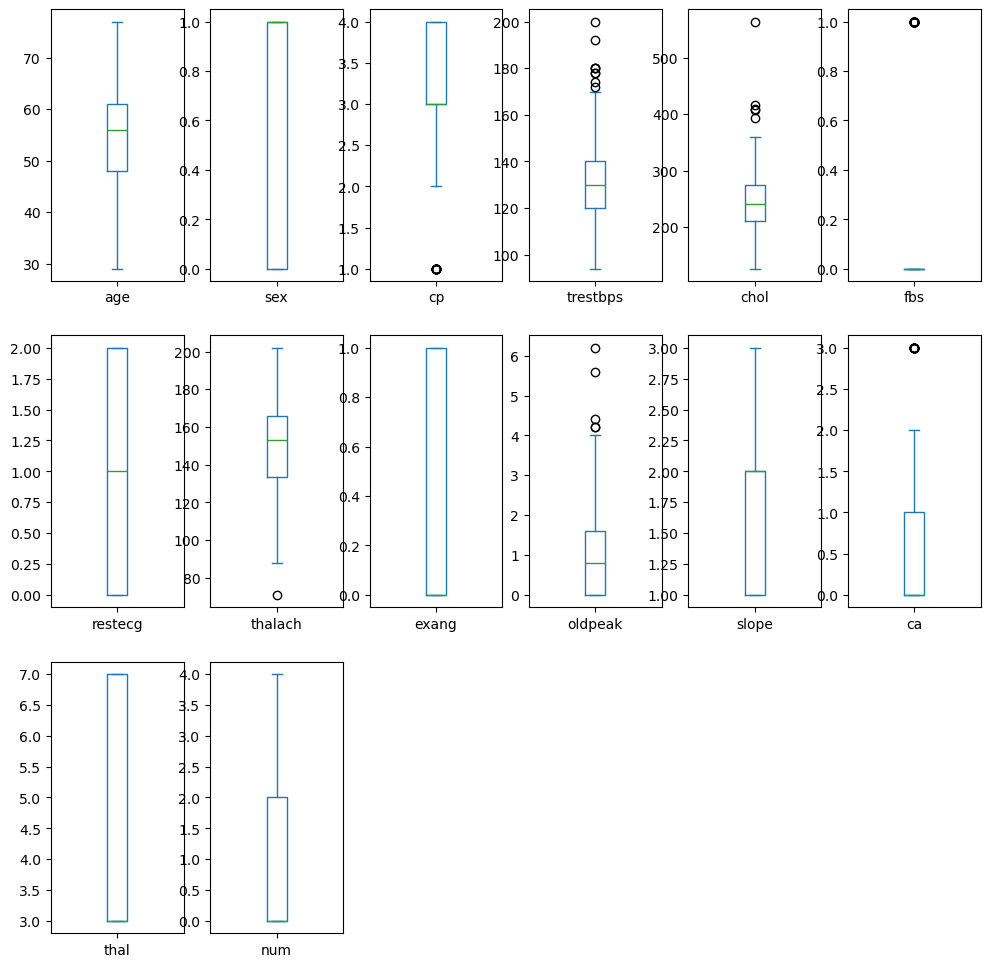

In [33]:
data.plot(kind='box',subplots=True, layout=(3,6), sharex=False, sharey=False, figsize=(12,12));

Nous avons identifié les outliers et choisi de les traiter de manière appropriée (les retirer ou les corriger).

In [35]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
low=q1-1.5*(q3-q1)
high=q3+1.5*(q3-q1)
#il faut quantifier le  de donnee aberrante pour chaque variable
taux_valeur_aberrate=((data<low) |(data>high)).sum()/data.shape[0]*100
taux_valeur_aberrate

age          0.000000
sex          0.000000
cp           7.590759
trestbps     2.970297
chol         1.650165
fbs         14.851485
restecg      0.000000
thalach      0.330033
exang        0.000000
oldpeak      1.650165
slope        0.000000
ca           6.600660
thal         0.000000
num          0.000000
dtype: float64

<Axes: >

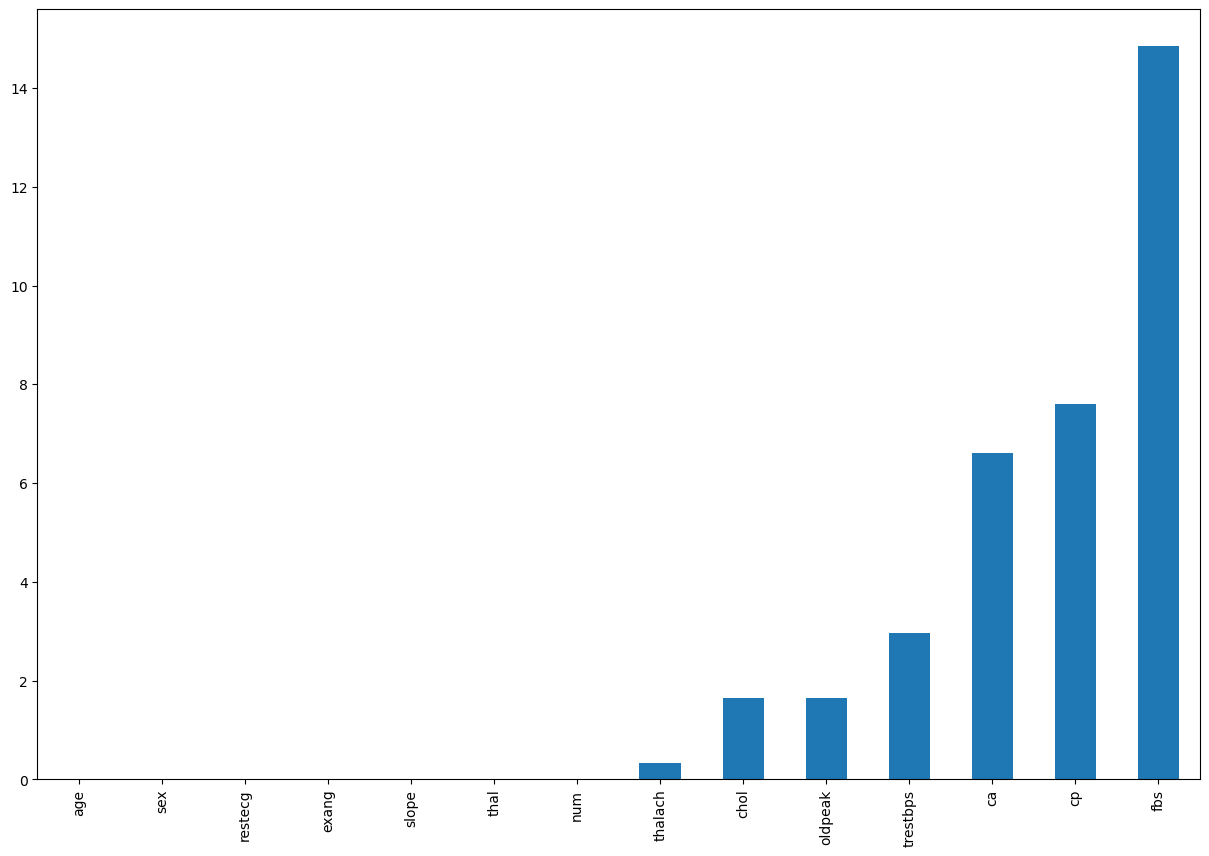

In [36]:
taux_valeur_aberrate.sort_values().plot(kind="bar", figsize=(15,10))

In [37]:
#3 donnees presentent trop de donnees aberrantes (plus de 5%), ca (vaisseaux sanguins), cp (douleur), fbs (sucre)

## Imputation des valeurs manquantes

Les valeurs manquantes peuvent être remplacées par la moyenne, la médiane ou d'autres stratégies, ou bien supprimées si elles sont rares.

In [40]:
info=pd.DataFrame()
info["Manquant"]=valeur_manquante
info["Aberrante"]=taux_valeur_aberrate
info

,Manquant,Aberrante
Unnamed: 0,0,NaN
age,0,0.000000
sex,0,0.000000
cp,0,7.590759
trestbps,0,2.970297
chol,0,1.650165
fbs,0,14.851485
restecg,0,0.000000
thalach,0,0.330033
exang,0,0.000000


In [41]:
#Decision
#pour ca , on impute par la mediane car le taux de valeur aberrante depasse 5%
data.ca=data.ca.fillna(data.ca.median())

#pour thal , on impute par la moyenne car le taux de valeur aberrante est inferieur à 5%
data.thal=data.thal.fillna(data.thal.mean())

In [42]:
data.isna().sum().sum()   # aucune donnee manquante!!!

0

## Analyse Univariée rapide

Une analyse univariée consiste à examiner la distribution d'une variable à la fois. Cela permet de mieux comprendre les caractéristiques des variables individuelles.

In [45]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0


<Axes: ylabel='count'>

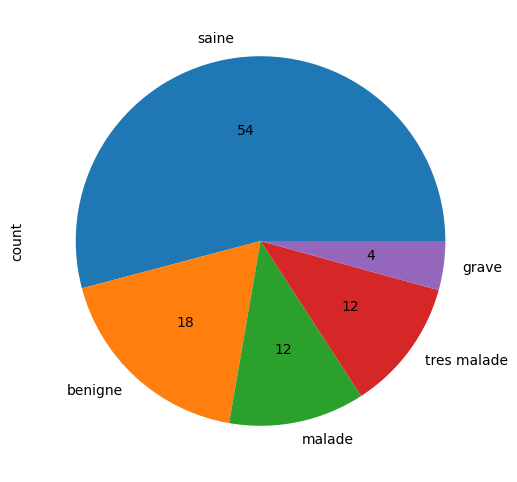

In [46]:
data.num.value_counts().plot(kind="pie", figsize=(6,6),autopct="%1.0f", 
                            labels=["saine","benigne","malade","tres malade","grave"])


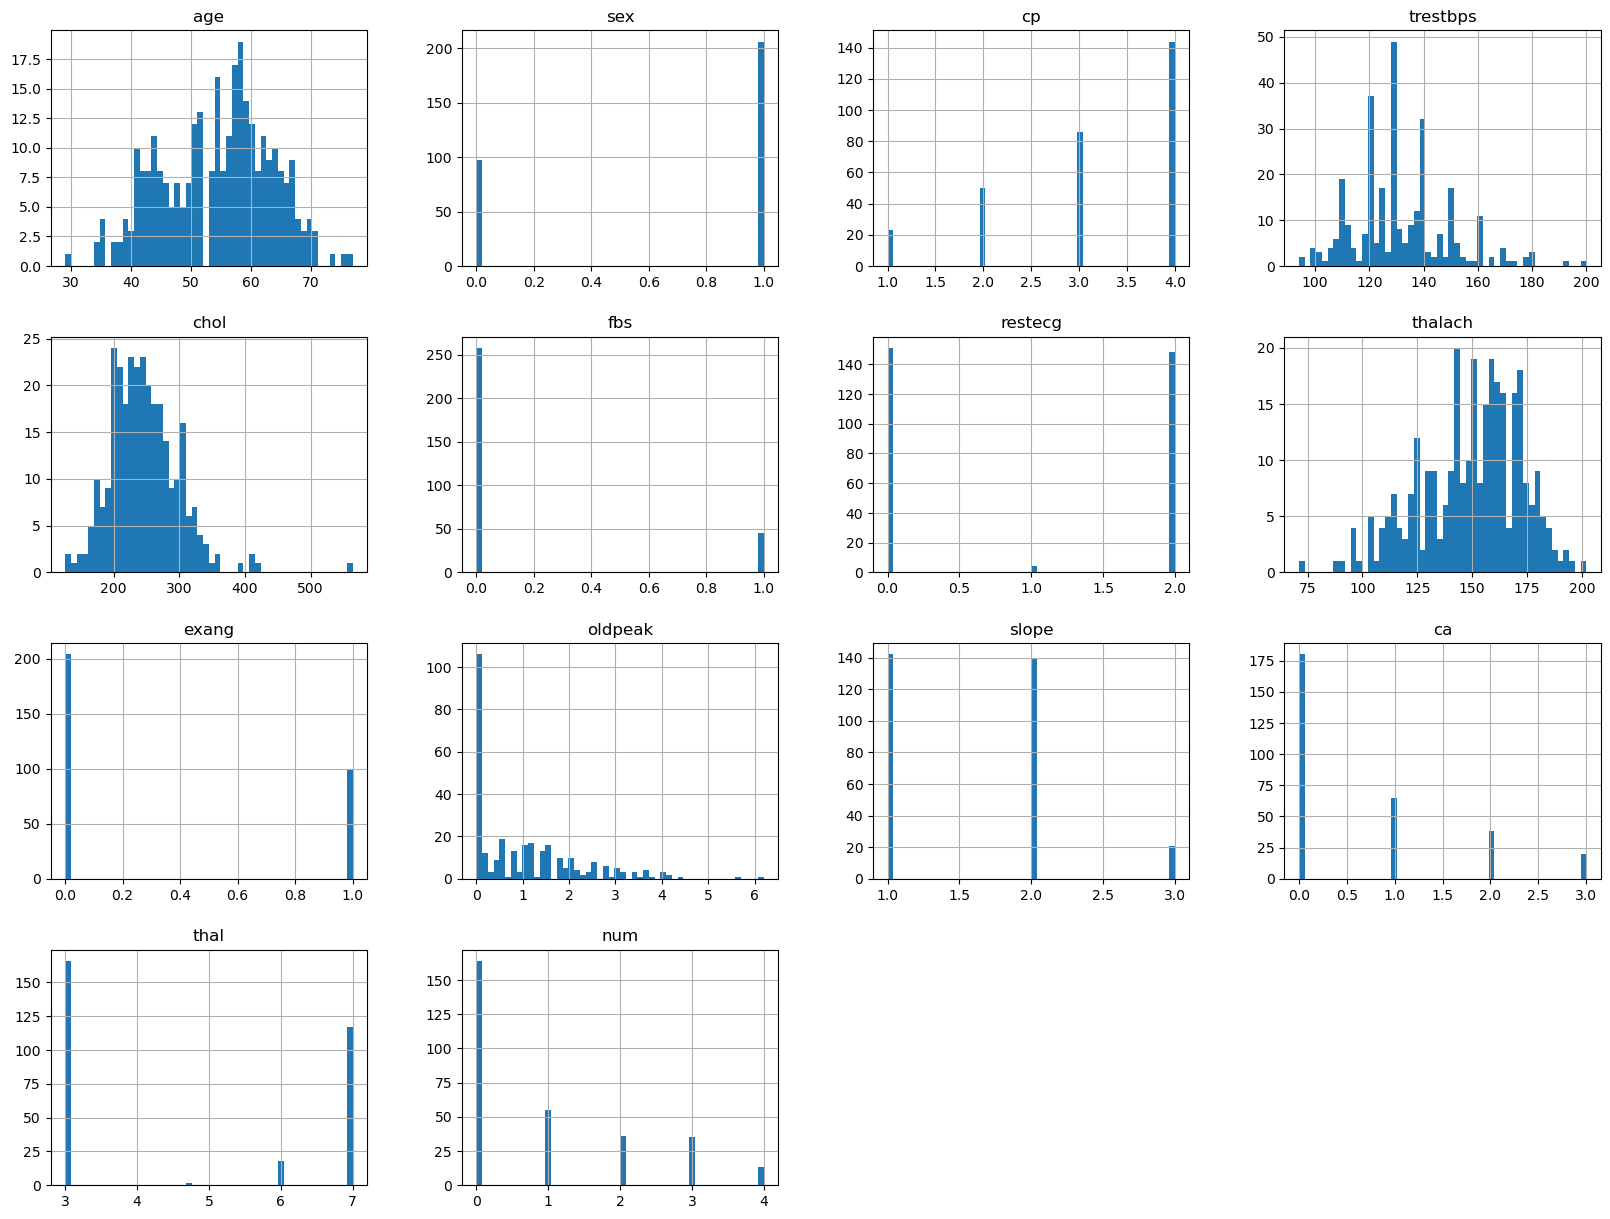

In [47]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [48]:
#est ce que la maladie est un phenomene dù au hasard?

<Axes: ylabel='Density'>

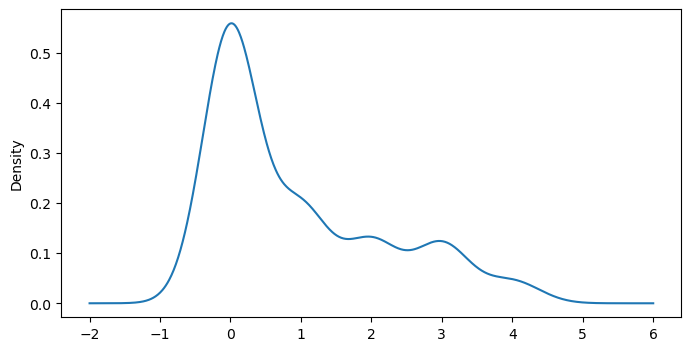

In [49]:
data.num.plot(kind="density", figsize=(8,4))

In [50]:
#visuellement la maladie n'est pas due au hasard (subjective)
#pour une objectivité, il faut faire un test de normalité

In [51]:
import scipy
pvalue=scipy.stats.shapiro(data.num)[1]
pvalue

5.594370954629859e-21

In [52]:
#pvalue<5% donc la maldie n'est pas due au hasard et pourrait etre expliquée par d'autres facteurs!!!!!!!!!!!!!!!!!!!!!

## Analyse Bivariée rapide

L'analyse bivariée examine la relation entre deux variables. Cela peut inclure l'analyse de corrélation ou la visualisation de la relation entre la variable cible et les autres.

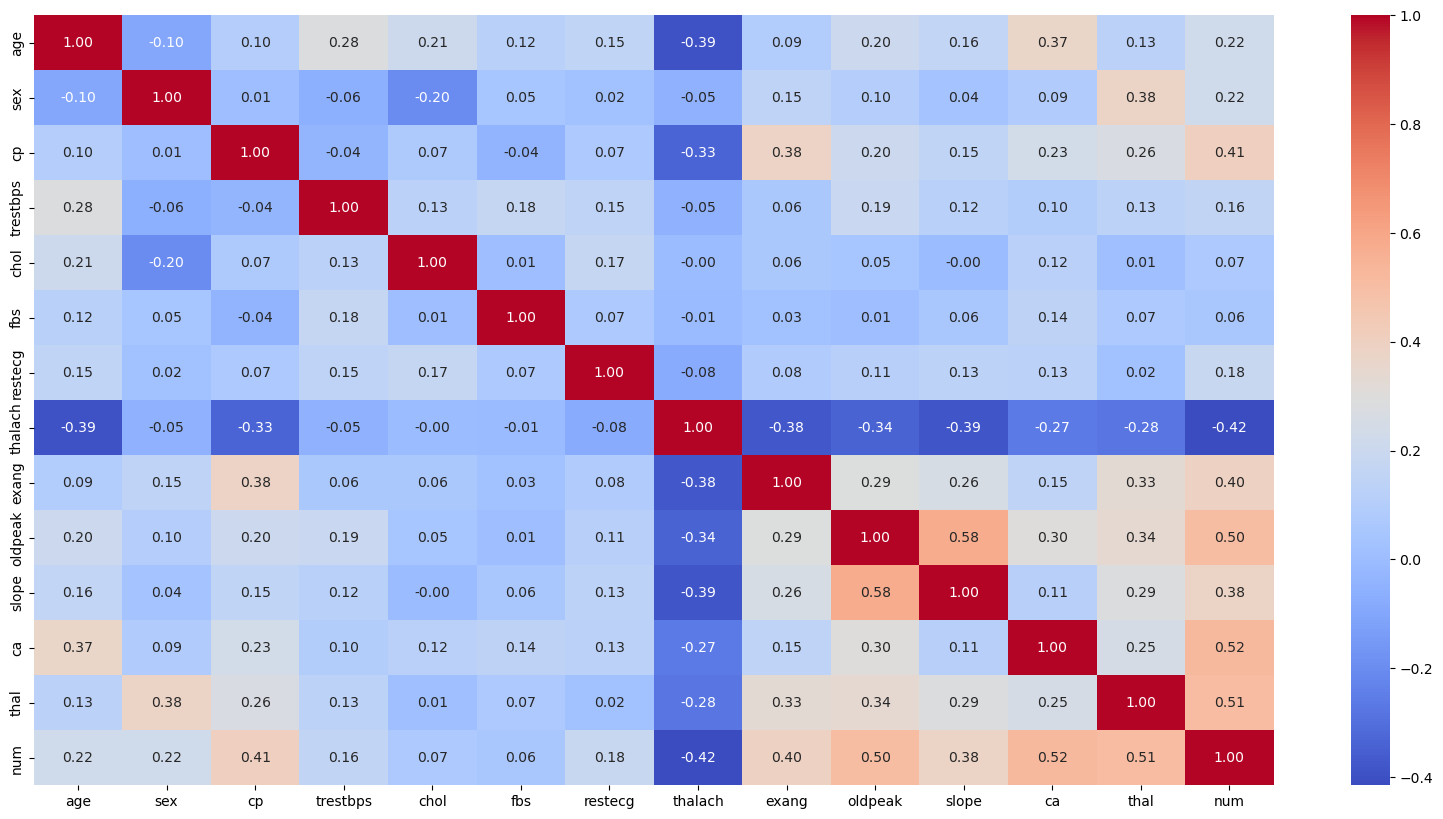

In [55]:
f, ax = plt.subplots(figsize=(20, 10))    #1 correspond à 2.54cm
sns.heatmap(data.corr(),annot=True,fmt="1.2f",cmap='coolwarm');

 using dython library
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(20, 10))
r = associations(data, ax = ax, cmap = "coolwarm")

In [57]:
#la maladie est fortement corrélée avec les variables thal, ca, slope, oldpeak,exang, thalach,age, cp, sex à plus de 20%
#et avec les variables  trestbps, chol, fbs, restecg à moins de 20%

fbs
0    0.851485
1    0.148515
Name: proportion, dtype: float64

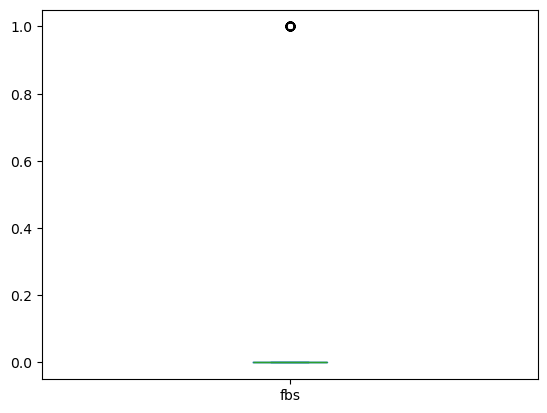

In [58]:
data.fbs.plot(kind="box")
data.fbs.value_counts(normalize=True)   #attention à cette variable qui est trop desequilibrée!!!!!!!!!!!!

In [59]:
#est ce que la maladie depend de l'age????????????

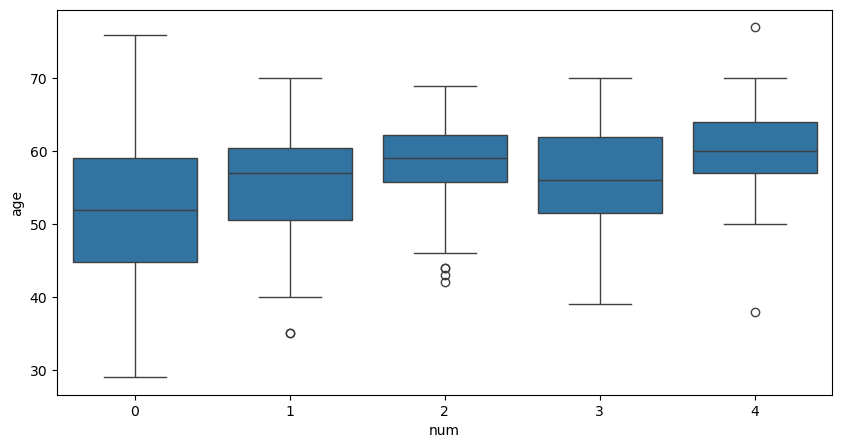

In [60]:
#VISUALISER
f, ax = plt.subplots(figsize=(10, 5))    #1 correspond à 2.54cm

sns.boxplot(x="num",y="age", data=data);

In [61]:
#TEST DE KARL PEARSON
#HO: " les variables sont INDEPENDANTES"

In [62]:
scipy.stats.pearsonr(data.num,data.age)  #affiche (correlation, pvalue=veraccité de h0)

PearsonRResult(statistic=0.2228534192759528, pvalue=9.135845384933172e-05)

In [63]:
#pvalue<5% donc les variables sont dependantes

In [64]:
#il faudra garder l'age pour le modele!!!

In [65]:
#pour le taux de cholesterol

In [66]:
scipy.stats.pearsonr(data.num,data.chol)

PearsonRResult(statistic=0.07090875545132239, pvalue=0.21841662513553653)

## Separer le dataset en X et y

Pour entraîner un modèle, nous devons séparer les caractéristiques (X) et la variable cible (y).



In [69]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [70]:

X= data.drop(["num"],axis=1)  #variables explicatives: features
y = data["num"]  #variable à expliquer ou à predire: label


In [71]:
y.value_counts(normalize=True)

num
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: proportion, dtype: float64

In [72]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


## Encodage des variables qualitatives

Certaines variables peuvent être catégoriques. Ces variables doivent être encodées en valeurs numériques avant de les utiliser dans un modèle de machine learning.

In [75]:
X=pd.get_dummies(X)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [76]:
#X contient maintenant que des variables numeriques!!

In [77]:
y.head(3)

0    0
1    2
2    1
Name: num, dtype: int64

In [78]:
y=y.apply(lambda x: 0 if x== 0 else 1)   #si y=desease alors on le remplace par 1 sinon par 0
y.head(3)

0    0
1    1
2    1
Name: num, dtype: int64

## Normalisation de donnees

La normalisation est nécessaire pour certaines méthodes de machine learning afin que toutes les variables soient sur la même échelle.

In [81]:
X.head() #les donnees ne sont pas aux memes echelles donc on va normaliser ou standardiser

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [82]:
#X=(X-moyenne)/ecarttype

X=(X-X.mean())/X.std()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.947160,0.685069,-2.248056,0.756274,-0.264463,2.390484,1.015005,0.017169,-0.69548,1.085542,2.270822,-0.709957,0.654735
1,1.389703,0.685069,0.876535,1.608559,0.759159,-0.416945,1.015005,-1.818896,1.43311,0.396526,0.648041,2.500744,-0.897038
2,1.389703,0.685069,0.876535,-0.664201,-0.341717,-0.416945,1.015005,-0.900864,1.43311,1.343924,0.648041,1.430510,1.171993
3,-1.929372,0.685069,-0.164995,-0.096011,0.063869,-0.416945,-0.995103,1.634655,-0.69548,2.119067,2.270822,-0.709957,-0.897038
4,-1.486829,-1.454889,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,0.978917,-0.69548,0.310399,-0.974740,-0.709957,-0.897038


## Division du dataset en ensembles d'entraînement, validation et test


Nous devons diviser les données en trois ensembles : un ensemble d'entraînement pour construire le modèle, un ensemble de validation pour ajuster les hyperparamètres, et un ensemble de test pour évaluer la performance finale.

In [85]:
import sklearn
from sklearn.model_selection import train_test_split

#demandonsà notre modele de se concentrer sur la prediction des personnes malades ou saines

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=100)  
# (X_train et y_train) pour l 'entrainement du futur modele d'ia: 80% du dataset est reservé pour cela
# (X_test et y_test) pour tester et valider le futur modele d'ia: 20% du dataset est reservé pour cela
#random_state est pour la reproductiblité (optionnel)

## First Machine Learning Model

Voici un résumé des analogies pour diverses méthodes en apprentissage automatique que nous verrons dans ce cours, destiné à rendre leurs concepts plus accessibles :

1. **K-Nearest Neighbors (KNN)** : "Dites-moi qui sont vos voisins, et je vous dirai qui vous êtes." — Utilise la proximité des exemples pour prédire la classification ou la valeur d'un nouveau point.

2. **Support Vector Machine (SVM)** : "Trouvons le meilleur mur pour séparer les différents groupes." — Trouve le meilleur hyperplan qui sépare les différentes classes avec une marge maximale.

3. **Naive Bayes** : "Si cela ressemble et agit comme quelque chose, alors c'est probablement cela." — Classe en se basant sur la probabilité, supposant l'indépendance entre les caractéristiques.

4. **Régression Logistique** : "Sur une échelle de 0 à 1, à quel point êtes-vous sûr que c'est la bonne décision ?" — Estime la probabilité qu'une instance appartienne à une classe particulière.

5. **Random Forest** : "Consulter un groupe diversifié pour arriver à la meilleure conclusion." — Utilise de nombreux arbres de décision pour améliorer la robustesse et la précision de la prédiction.

6. **Arbre de Décision** : "Suivre un chemin dans un labyrinthe basé sur des choix simples à chaque intersection." — Utilise une série de tests sur les caractéristiques pour aboutir à une décision ou prédiction.

7. **Régression Linéaire** : "Tracer la meilleure ligne droite à travers les points de données." — Modélise la relation entre des variables par une ligne droite, ajustant au mieux les données observées.


8. **Ensemble Learning** : "La décision finale est un consensus parmi de nombreux juges." — Combine les prédictions de plusieurs modèles pour produire une meilleure prédiction globale.




<Axes: xlabel='chol', ylabel='age'>

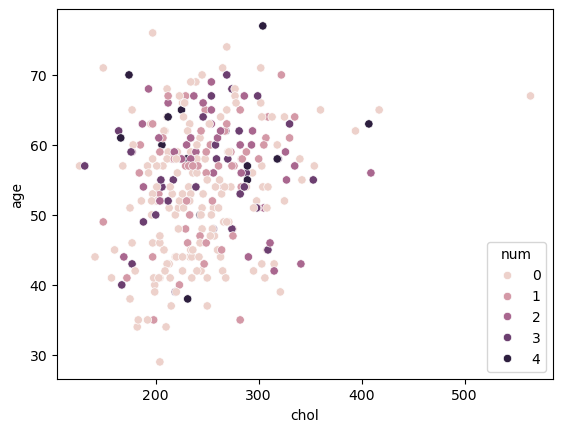

In [88]:
sns.scatterplot(x="chol", y="age",data=data, hue="num")

In [89]:
from sklearn.neighbors import KNeighborsClassifier  # model KNN
from sklearn.metrics import accuracy_score, confusion_matrix  #metriques

In [90]:

#choisir le modele
model = KNeighborsClassifier(5)

#entrainer le modele 
model.fit(X_train, y_train)

#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(model.score(X_train, y_train)))
print('Precision test : {:.2f}'.format(model.score(X_test, y_test)))

Precision train: 0.88
Precision test : 0.89


In [91]:
#notre premier modele ultra-simple donne une exactitude de 88 en entrainement et 89% en test

In [92]:
#on parle de UNDERfitting, si precision_test>precision_train  (arrive raremement)
#on parle de OVERFITTINGfitting, si precision_train-precision_test>5%  (un ecart de 5%, arrive FREQUEMMENT dans les modeles)

In [93]:
#Faire une prediction avec le modele pour avoir les classes
prediction_proba = model.predict_proba(X_test)
prediction_proba[0:5]

array([[0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4]])

In [94]:
#Faire une prediction avec le modele pour avoir les classes
prediction_classe = model.predict(X_test)
prediction_classe

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [95]:

#voir les resultats du modele:
y_verif= pd.DataFrame({'Realite':y_test, 'prediction':prediction_classe})
y_verif.head(5)

,Realite,prediction
69,1,0
300,1,1
220,0,0
134,0,0
7,0,0


## Matrice de confusion

La matrice de confusion affiche le nombre de vraies et fausses prédictions pour chaque classe (maladie cardiaque présente ou non).

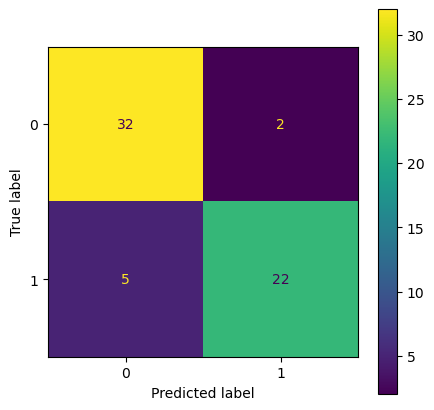

In [98]:
#permet de visualiser les metriques: fp,fn,tp,tn, seuil

from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 5
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, prediction_classe);
#il faut minimer les faux negatifs car on apporte une assistance

In [99]:
#permet de visualiser les metriques: precison, rappel, fi-score, seuil
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=["saine","malade"]))   

              precision    recall  f1-score   support

       saine       0.86      0.94      0.90        34
      malade       0.92      0.81      0.86        27

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [100]:
from sklearn.svm import SVC

#choisir le modele
modelsvm =SVC()

#entrainer le modele 
modelsvm.fit(X_train, y_train)

#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(modelsvm.score(X_train, y_train)))
print('Precision test : {:.2f}'.format(modelsvm.score(X_test, y_test)))


Precision train: 0.89
Precision test : 0.90


In [101]:
from sklearn.linear_model import LogisticRegression

#choisir le modele
modellog =LogisticRegression() #les modèles de regression // de classification estime des quantinté // des probabilités

#entrainer le modele 
modellog.fit(X_train, y_train)

#voir la performance du modele: precision
print('Precision train: {:.2f}'.format(modellog.score(X_train, y_train)))
print('Precision test : {:.2f}'.format(modellog.score(X_test, y_test)))
print('\n')

Precision train: 0.84
Precision test : 0.87




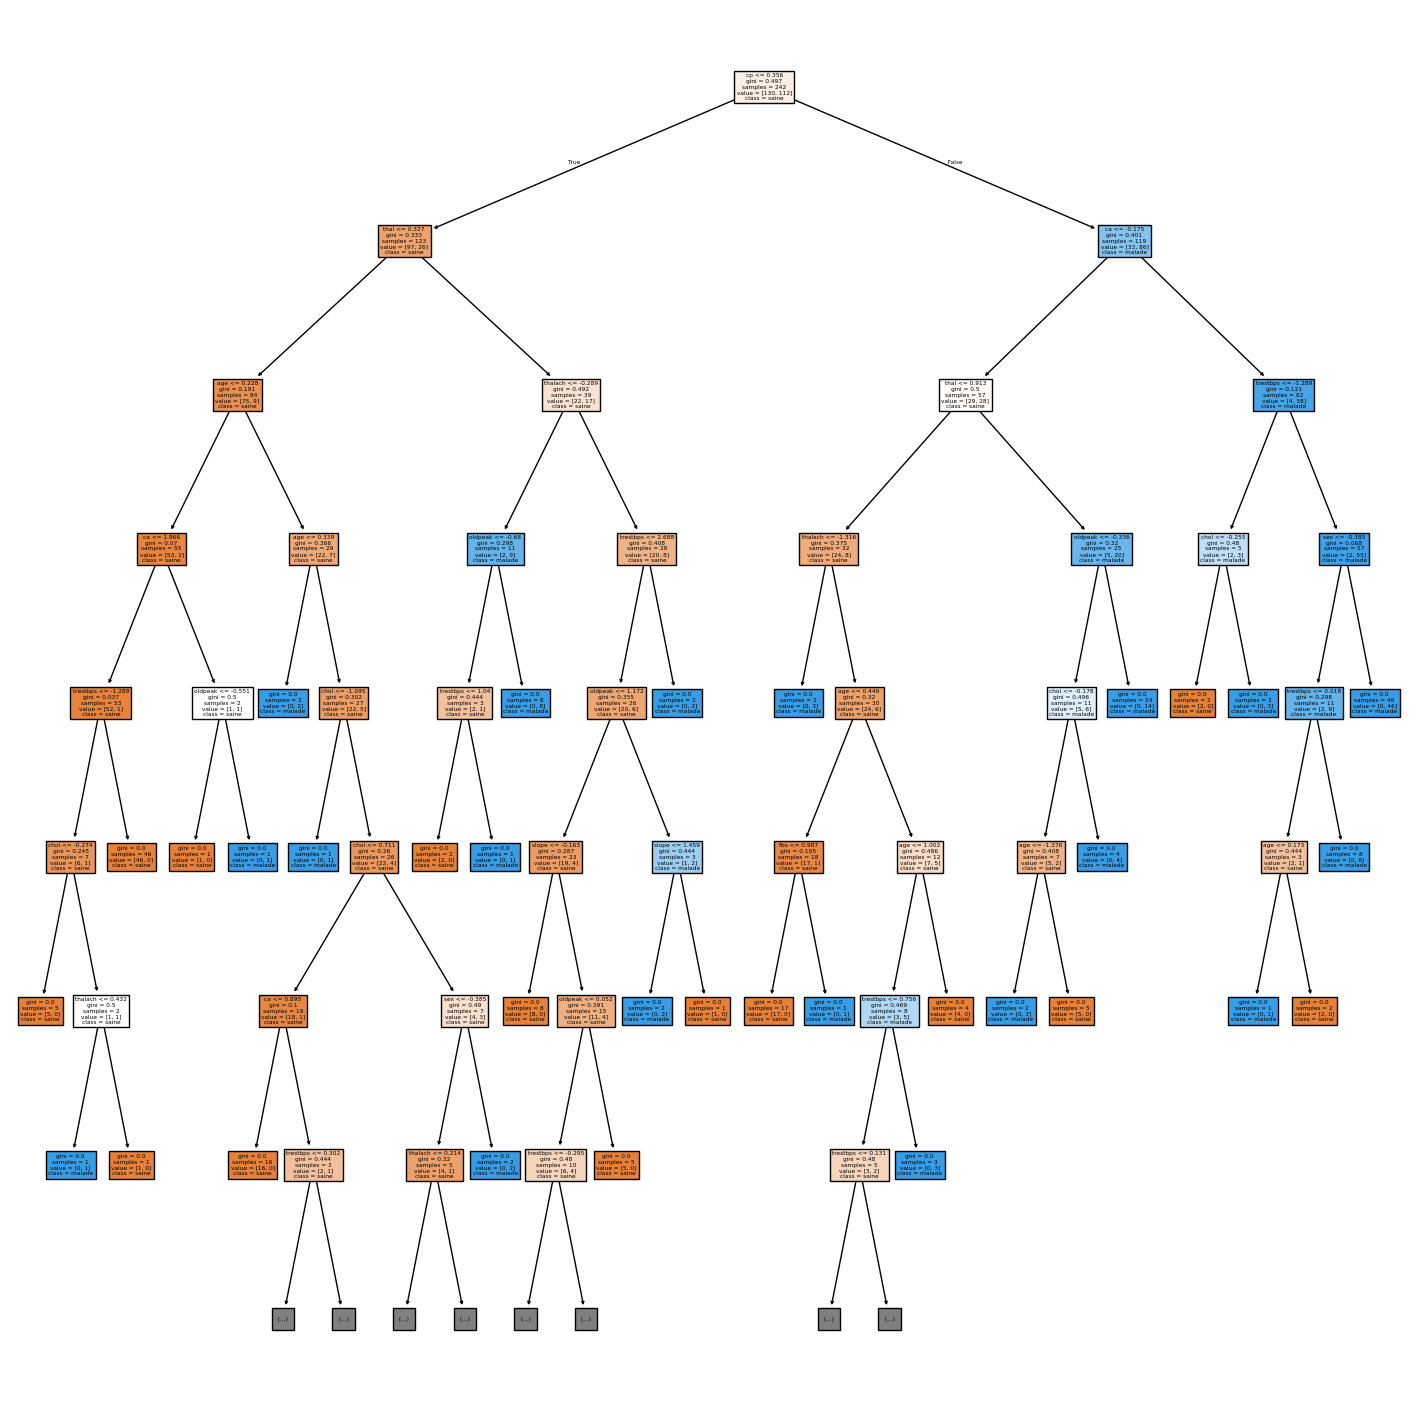

In [102]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
plt.rcParams['figure.figsize'] = 18, 18

best_tree = tree.DecisionTreeClassifier().fit(X_train, y_train) 
tree.plot_tree(best_tree, max_depth=7, feature_names=X.columns, filled=True,class_names=['saine',  'malade']);

#plt.savefig('decision_tree.png', bbox_inches="tight")


## Hyperparametres du modele knn

Les hyperparamètres sont des paramètres du modèle que nous devons ajuster manuellement (par exemple, la régularisation dans la régression logistique). Nous allons explorer l'impact des différents hyperparamètres sur les performances du modèle.

Définir un dictionnaire d'hyperparamètres.
Choisir une mesure de la qualité. 
Avec une technique de recherche aleatoire dans le dictionnaire précédent, 
déterminer les meilleurs hyperparamètres selon la métrique choisie. 
Utiliser pour cela la fonction Grid Search (Connexions vers un site externe.). 
Afficher la valeur de ces hyperparamètres.

In [106]:
#Pour le KNN
nb_neighbors=list(range(3,15))
metric= ['euclidean', 'manhattan','minkowski']
hyper_param = dict(n_neighbors=nb_neighbors, metric=metric)
hyper_param

{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'metric': ['euclidean', 'manhattan', 'minkowski']}

## GridSearchCV: Hyperparamètres

Objectif: Optimiser les hyperparamètres d’un modèle

Utilisation: Teste plusieurs combinaisons d’hyperparamètres avec CV pour trouver la meilleure

Certains modèles, comme les forêts aléatoires ou les SVM ou KNN, ont des hyperparamètres que nous pouvons ajuster pour améliorer leurs performances. Nous allons voir comment les ajuster dans un modèle avec caret.

La recherche en grille (GridSearch) permet de tester systématiquement plusieurs combinaisons d’hyperparamètres et d’évaluer les performances à l’aide de la validation croisée.

Le Grid Search Cross Validation est une méthode d’optimisation des hyperparamètres. Il utilise la validation croisée pour évaluer un modèle sur plusieurs combinaisons d’hyperparamètres afin de trouver la meilleure configuration pour un modèle donné.

Grid Search : Il construit une grille de toutes les combinaisons possibles d’hyperparamètres (ex. les valeurs de C et de gamma pour un SVM). Validation croisée : Pour chaque combinaison d’hyperparamètres, Grid Search applique une validation croisée pour évaluer la performance moyenne du modèle. Objectif : Trouver la meilleure combinaison d’hyperparamètres en fonction de la performance mesurée.

In [110]:
from sklearn.model_selection import GridSearchCV
#On va chercher les meilleurs parametres pour augmenter le "recall" de notre modele
grid = GridSearchCV(model,hyper_param,scoring='recall')

grid.fit(X_train, y_train)
print(grid.best_params_)
print("score test:",grid.best_score_)
print(grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 3}
score test: 0.8118577075098814
KNeighborsClassifier(metric='manhattan', n_neighbors=3)


## Métriques classiques 

Les métriques classiques permettent d'évaluer la performance d'un modèle. Ces métriques incluent la précision (accuracy), la précision (precision), le rappel (recall), et le F1-score.

In [113]:
#permet de visualiser les metriques: precison, rappel, fi-score, seuil
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=["saine","malade"]))   



              precision    recall  f1-score   support

       saine       0.86      0.94      0.90        34
      malade       0.92      0.81      0.86        27

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [114]:
5+5

10

In [115]:
from sklearn.metrics import *
prediction=prediction_classe
print( "Precision", precision_score(y_test, prediction, average='weighted'))
print("Recall:", recall_score(y_test, prediction, average='weighted'))
print( "F1 score: ",f1_score(y_test, prediction, average='weighted'))

Precision 0.8877935312361541
Recall: 0.8852459016393442
F1 score:  0.8842951634590572


In [116]:
#le modele a une precision de 90% et un rappel de 90% (tres bien pour un premier modele avec knn)

## Courbe Precision/ Rappel

La courbe Précision / Rappel est une visualisation utile pour comprendre la balance entre ces deux métriques. Cette courbe est particulièrement importante lorsque les classes sont **déséquilibrées**.

Pour déterminer le seuil optimal (threshold) à partir d'une courbe de précision-rappel

predict_proba(X_test)[:, 1] génère les scores de probabilité pour la classe positive.
precision_recall_curve fournit les valeurs de précision, rappel, et les seuils correspondants.
Vous pouvez définir un critère pour trouver le seuil optimal (par exemple, **maximiser le F1-score**).

Optimal threshold based on maximum F1-score: 0.6


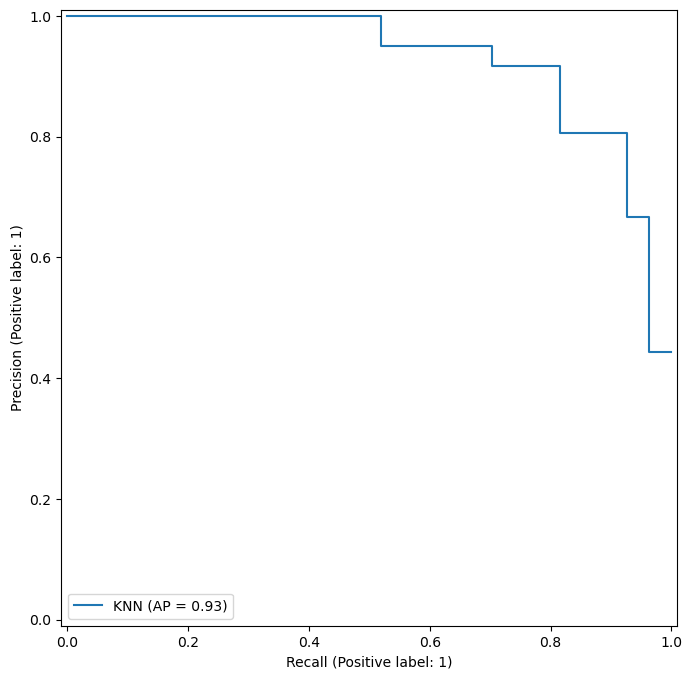

In [121]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
plt.rcParams['figure.figsize'] = 8, 8

# Suppose you have predictions probabilities from your model
y_scores = model.predict_proba(X_test)[:, 1]  # Assuming a binary classification model

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Optionally plot the curve
disp = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="KNN")
#disp.plot()

# To find the threshold corresponding to the optimal point (example: maximizing F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_index = f1_scores.argmax()  # Index of maximum F1-score
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold based on maximum F1-score: {optimal_threshold}")


Le "threshold" est le point de coupure pour cette probabilité. Par défaut, dans de nombreux algorithmes, ce seuil est fixé à 0,5 (c'est-à-dire que si la probabilité qu'une observation soit positive est supérieure à 0,5, elle est classée comme positive ; sinon, elle est classée comme négative).

Dans le contexte de la courbe de précision-rappel que vous obtenez à l'aide de `sklearn` pour évaluer les performances de votre modèle de classification, **le "threshold" (ou seuil)** fait référence à la valeur à partir de laquelle votre modèle décide de classer une observation comme appartenant à la classe positive ou négative.

**Qu'est-ce que le "threshold" ?**

- Pour un modèle de classification binaire, la sortie du modèle peut être une probabilité que chaque observation appartienne à la classe positive.
- Le "threshold" est le point de coupure pour cette probabilité. Par défaut, dans de nombreux algorithmes, ce seuil est fixé à 0,5 (c'est-à-dire que si la probabilité qu'une observation soit positive est supérieure à 0,5, elle est classée comme positive ; sinon, elle est classée comme négative).

**Comment interpréter le "threshold" :**

- Si vous augmentez le seuil au-delà de 0,5, le modèle devient plus "conservateur" pour classer une observation comme positive (il faut une probabilité plus élevée pour qu'une observation soit considérée comme positive).
  - Cela **augmente la précision** (moins de faux positifs) mais peut réduire le rappel (plus de faux négatifs).
- Si vous diminuez le seuil en dessous de 0,5, le modèle devient plus "libéral" dans la classification positive.
  - Cela peut **augmenter le rappel** (moins de faux négatifs) mais diminuer la précision (plus de faux positifs).

**Comment l'utiliser :**

Pour ajuster le seuil de décision dans votre modèle en fonction de vos objectifs métier (par exemple, minimiser les faux négatifs pour des applications médicales critiques ou maximiser la précision pour réduire les coûts), vous pouvez :

1. **Analyser la courbe de précision-rappel :**
   - Utilisez les valeurs de précision et de rappel pour différents seuils afin de trouver un compromis adapté à votre cas d'usage.
   - Par exemple, si vous souhaitez maximiser le F1-score, vous pouvez trouver le seuil qui maximise cette métrique.

2. **Changer le seuil dans vos prédictions :**
   - Si vous avez trouvé que le seuil optimal est, par exemple, `0,7`, au lieu d'utiliser la valeur par défaut (0,5), vous pouvez appliquer :
     ```python
     y_pred = (model.predict_proba(X_test)[:, 1] >= 0.7).astype(int)
     ```
   - Cela signifie que le modèle classera une observation comme positive uniquement si la probabilité de la classe positive est d'au moins 0,7.

**Utilisation pratique :**
- **Cas d'usage 1 (Maximiser le rappel) :** Pour les problèmes où les faux négatifs sont coûteux, comme dans les diagnostics médicaux (ne pas manquer une maladie grave), vous pouvez choisir un seuil plus bas pour maximiser le rappel, quitte à sacrifier un peu de précision.
- **Cas d'usage 2 (Maximiser la précision) :** Si les faux positifs doivent être évités (par exemple, éviter d'envoyer des alertes inutiles), vous pouvez choisir un seuil plus élevé pour maximiser la précision.

**En résumé :** Le "threshold" est un levier permettant de faire un compromis entre la précision et le rappel en fonction de vos besoins métier. En ajustant ce seuil, vous pouvez contrôler la sensibilité et la spécificité de votre modèle de classification.

## Maximiser le bénéfice en utilisant la courbe Précision-Rappel :


Pour maximiser le bénéfice en utilisant la courbe de Précision-Rappel, vous pouvez ajuster les prédictions de votre modèle en fonction du seuil optimal qui maximise votre fonction de bénéfice, en vous basant sur les coûts et bénéfices associés aux faux négatifs (FN), faux positifs (FP), vrais positifs (VP), et vrais négatifs (VN). Voici comment procéder :

**Étapes avec la courbe de Précision-Rappel pour maximiser le bénéfice**

1. Calculez les valeurs de précision, rappel et les seuils.
2. Pour chaque seuil, calculez les FN, FP, VP, VN, et utilisez votre fonction de bénéfice pour déterminer le seuil optimal.



Optimal threshold to maximize the benefit: 0.2
Maximum benefit: 600000


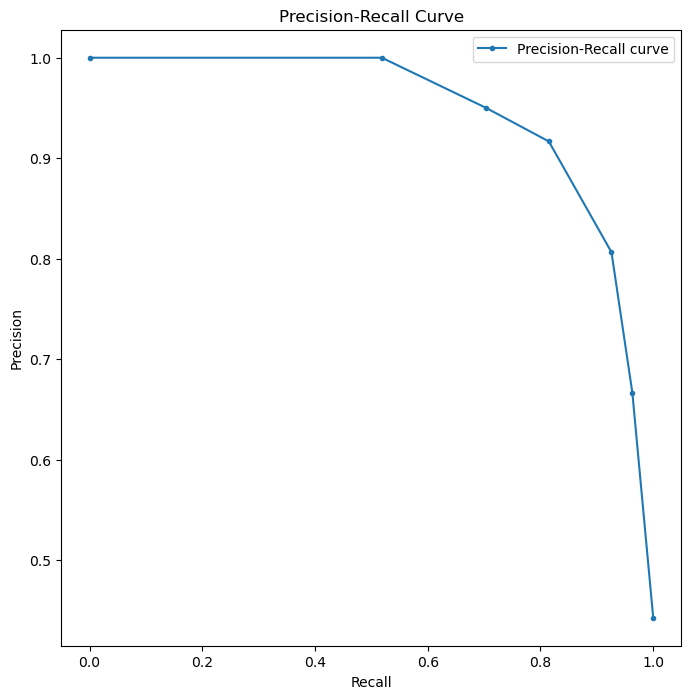

In [126]:


import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Suppose you have a trained model and test data
# y_test: true labels
# y_scores: predicted probabilities for the positive class (e.g., model.predict_proba(X_test)[:, 1])

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Add a dummy threshold at the end for completeness (since precision_recall_curve omits the last threshold)
thresholds = np.append(thresholds, 1.0)

# Define costs and benefits
cost_fn = 50000  # Cost of a false negative
cost_fp = 10000  # Cost of a false positive
benefit_vp = 30000  # Benefit of a true positive
benefit_vn = 0  # Benefit of a true negative

benefits = []

for thresh in thresholds:
    # Predicted classes at the given threshold
    y_pred = (y_scores >= thresh).astype(int)
    
    # Calculate TP, FP, FN, TN
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    
    # Calculate benefit using your specified formula
    benefit = (benefit_vp * tp) + (benefit_vn * tn) - (cost_fn * fn) - (cost_fp * fp)
    benefits.append(benefit)

# Find the threshold that maximizes the benefit
optimal_index = np.argmax(benefits)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold to maximize the benefit: {optimal_threshold}")
print(f"Maximum benefit: {benefits[optimal_index]}")

# Plotting the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()





**Pourquoi utiliser la courbe de Précision-Rappel ?**
- Cette courbe est particulièrement utile lorsque vous travaillez avec des données déséquilibrées ou si vous souhaitez maximiser des métriques telles que la précision ou le rappel, ce qui peut avoir un impact direct sur votre fonction de bénéfice.

## Receiver operating characteristic ROC

La courbe ROC permet d'évaluer la performance d'un classificateur en comparant le taux de vrais positifs (rappel) et le taux de faux positifs à différents seuils de décision. L'aire sous la courbe (AUC) est une métrique globale de performance.

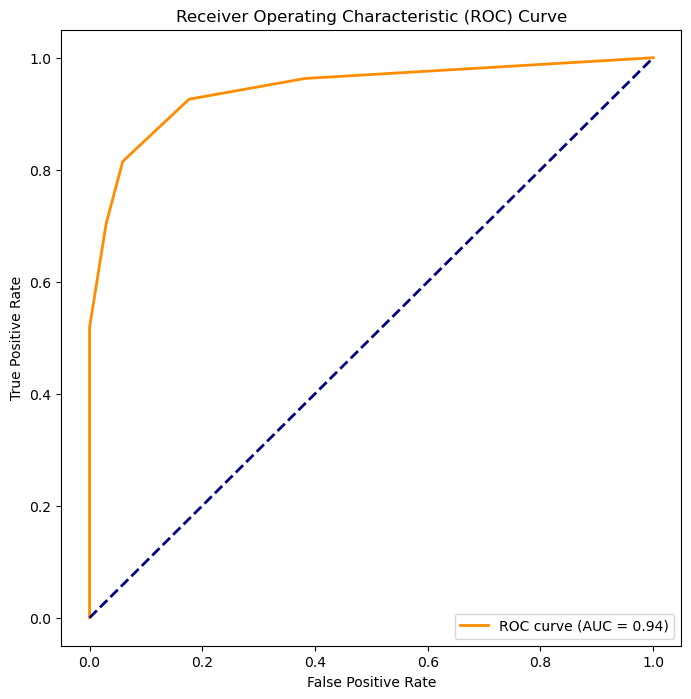

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suppose you have the true labels and predicted scores
# y_test: true labels (0 or 1 for binary classification)
# y_scores: predicted probabilities for the positive class (e.g., model.predict_proba(X_test)[:, 1])

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the area under the curve (AUC) for additional evaluation
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Maximiser le bénéfice en utilisant la courbe ROC :



In [132]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)

# Calculate FN, FP, VP, and VN for each threshold
# Assuming y_test is binary with 0 for the negative class and 1 for the positive class
benefits = []

# Define costs and benefits
cost_fn = 50000  # Cost of a false negative
cost_fp = 10000  # Cost of a false positive
benefit_vp = 30000  # Benefit of a true positive
benefit_vn = 100  # Benefit of a true negative

for thresh in roc_thresholds:
    # Predicted classes at the given threshold
    y_pred = (y_scores >= thresh).astype(int)
    
    # Calculate TP, FP, FN, TN
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    
    # Calculate benefit using your specified formula
    benefit = (benefit_vp * tp) + (benefit_vn * tn) - (cost_fn * fn) - (cost_fp * fp)
    benefits.append(benefit)

# Find the threshold that maximizes the benefit
optimal_index = np.argmax(benefits)
optimal_threshold = roc_thresholds[optimal_index]

print(f"Optimal threshold to maximize the benefit: {optimal_threshold}")
print(f"Maximum benefit: {benefits[optimal_index]}")


Optimal threshold to maximize the benefit: 0.2
Maximum benefit: 602100



## Pourquoi utiliser les deux courbes pour maximiser le bénéfice :
1. **Comparer les performances selon différents critères :**
   - La courbe **ROC** vous permet d'examiner la capacité globale du modèle à distinguer entre les classes, en se concentrant sur le compromis entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR).
   - La courbe de **Précision-Rappel** se concentre sur la précision et le rappel, ce qui est particulièrement utile si les classes sont déséquilibrées ou si l'objectif est d'optimiser des métriques spécifiques liées aux coûts/bénéfices.

2. **Choisir le seuil optimal pour maximiser le bénéfice :**
   - Vous pouvez calculer les bénéfices pour différents seuils en utilisant chaque courbe (comme nous l'avons fait dans les exemples précédents) et comparer les résultats.
   - Le seuil optimal pour maximiser le bénéfice peut être différent selon la courbe utilisée. En utilisant les deux, vous pouvez choisir celui qui offre la meilleure performance selon votre fonction de bénéfice.

3. **Cas pratique :**
   - Tracez les deux courbes (ROC et Précision-Rappel) et évaluez le bénéfice obtenu pour différents seuils.
   - Comparez le seuil et le bénéfice optimal trouvé pour chaque courbe.
   - Sélectionnez la courbe (et le seuil associé) qui offre le maximum de bénéfice selon votre fonction de coût/bénéfice.

**En résumé :**
Utiliser les deux courbes permet une approche plus complète pour optimiser vos résultats. Vous pouvez comparer les bénéfices obtenus à partir de chaque courbe et choisir celle qui vous offre le meilleur compromis selon vos priorités. Cette approche est particulièrement utile si vous avez des critères métier stricts basés sur les coûts ou si vos données présentent des caractéristiques spécifiques (comme un déséquilibre important des classes).

## Cross Validation 

Objectif: Évaluer la robustesse du modèle avec plusieurs jeux de données
Utilisation: Diviser les données pour obtenir une meilleure évaluation de la performance

Cours :

La validation croisée consiste à diviser les données en plusieurs sous-ensembles pour tester le modèle sur différents échantillons. Cela permet de mieux évaluer la performance du modèle et de détecter le surapprentissage (overfitting).

La validation croisée est une technique qui permet d’évaluer les performances d’un modèle sur plusieurs partitions d’un jeu de données. Elle consiste à diviser les données en plusieurs sous-ensembles (appelés “folds”), à entraîner le modèle sur certains de ces sous-ensembles, puis à le tester sur les sous-ensembles restants. Cela permet de réduire les biais liés à la division du jeu de données en ensembles de test et d’entraînement uniques. La technique la plus courante est la validation croisée k-fold :

K-Fold Cross Validation : Les données sont divisées en k sous-ensembles. Le modèle est entraîné sur k-1 sous-ensembles et testé sur le dernier. Ce processus est répété k fois, en changeant le sous-ensemble de test à chaque fois. L’objectif principal de la validation croisée est de mesurer la robustesse et la généralisation du modèle.

In [136]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Scores de validation croisée : {scores}")
print(f"Moyenne : {scores.mean()}")

Scores de validation croisée : [0.79591837 0.87755102 0.70833333 0.85416667 0.8125    ]
Moyenne : 0.8096938775510203


Les scores obtenus sur les différentes divisions des données seront affichés, ainsi que la moyenne des scores.

Les scores de validation croisée pour chaque fold seront affichés, avec une moyenne générale de la performance du modèle.



In [139]:
#le modele oscille entre 74 et 87%.
#IDEE: more data?
#sinon une autre solution :https://neovision.fr/data-augmentation-solutions-manque-donnees/

In [140]:
#notre modele est precis à 84% plus ou moins 4%
#IDEE: demander plus de donnees à votre societe
#sinon une autre solution :https://neovision.fr/data-augmentation-solutions-manque-donnees/

## Validation Curve

Objectif: Étudier l’effet d’un hyperparamètre spécifique
utilisation: Observer la performance (sous/sur-apprentissage) en fonction d’un hyperparamètre spécifique

 Cours :
Une courbe de validation permet d’analyser comment les performances d’un modèle évoluent lorsque l’on fait varier une valeur d’hyperparamètre spécifique (ex. le taux d’apprentissage ou C pour un SVM). Contrairement à Grid Search CV qui cherche la meilleure combinaison d’hyperparamètres, la validation curve se concentre sur l’évaluation d’un seul hyperparamètre à la fois.

Objectif : Visualiser l’effet d’un hyperparamètre sur les erreurs d’entraînement et de validation (ex. overfitting, underfitting). Courbes d’entraînement et de validation : Elle génère deux courbes, une pour les données d’entraînement et une pour les données de validation, ce qui permet de visualiser quand un modèle devient trop complexe (overfitting) ou trop simple (underfitting).

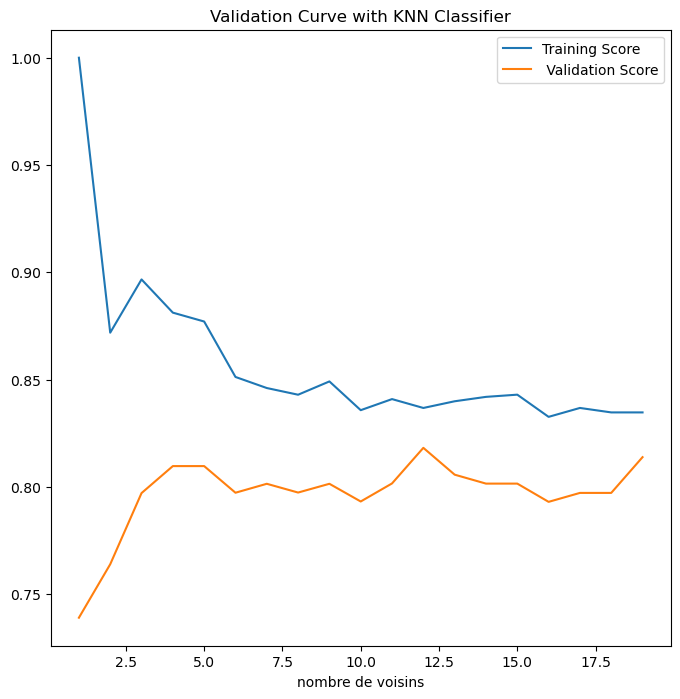

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
voisins = np.arange(1, 20, 1)

train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,
                                           param_name = "n_neighbors",
                                           param_range = voisins,
                                           scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(voisins, mean_train_score,label = "Training Score")
plt.plot(voisins, mean_test_score,label = " Validation Score")

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("nombre de voisins")
plt.legend(loc = 'best')
plt.show()


In [144]:
#comment j apprends suivant un des hyperparamtres

In [145]:
#il semblerait que notre precision en test augmenterait en fonction du nombre de voisins
#bonne nouvelle: on pourrait converger en test et en train avec 82%

## Learning Curve 

La courbe d’apprentissage montre comment les performances d’un modèle évoluent en fonction de la taille de l’ensemble d’entraînement. Cela aide à déterminer si un modèle a besoin de plus de données pour améliorer ses performances.

La courbe d’apprentissage (ou learning curve) permet de visualiser comment les performances d’un modèle évoluent en fonction de la taille de l’ensemble d’entraînement. Elle est très utile pour diagnostiquer des problèmes de sous-apprentissage (underfitting) ou de sur-apprentissage (overfitting). Dans ce cas, nous allons appliquer cette méthode avec le modèle KNN (k-nearest neighbors) sur votre dataset de détection de maladies cardiaques.

  File "C:\Users\pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


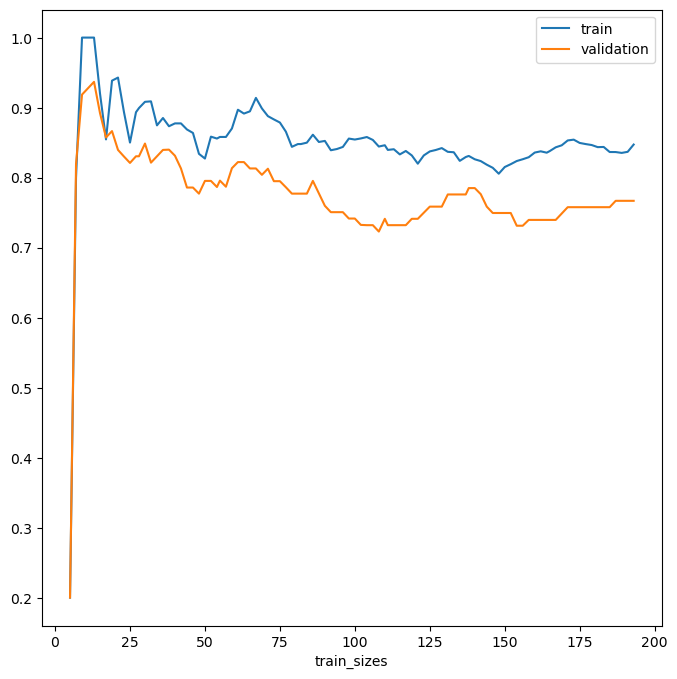

In [148]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,scoring="recall",
                                           train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
#D apres les deux courbes, il nous faudrait plus de données pour ameliorer la precision du modele


In [149]:
#le modele reste instable(trop de variation constatée)
#Il semblerait que plus de données augmenterait la capacité predictive du modele.La courbe d’apprentissage montrera comment l’accuracy évolue lorsque la taille de l’ensemble d’entraînement augmente.



## Feature Importances

L'importance des caractéristiques montre quelles variables ont le plus d'impact sur le modèle de classification. Cela permet de comprendre les facteurs déterminants pour la prédiction.

In [152]:
!pip install yellowbrick

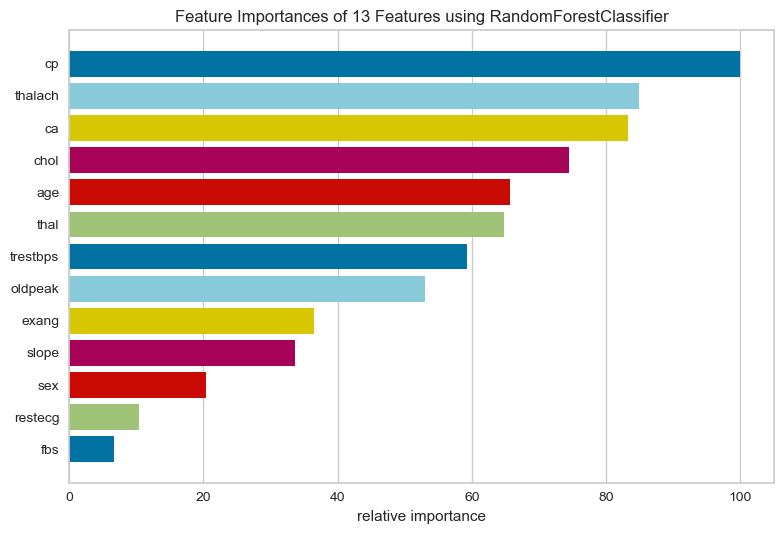

In [153]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import FeatureImportances


model = RandomForestClassifier(n_estimators=28)
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show();

Les importances des caractéristiques seront affichées, ce qui permet de savoir quelles variables influencent le plus la prédiction.

## Visualisation d'un arbre de décision

La visualisation d'un arbre de décision permet de comprendre comment le modèle prend des décisions. Cela est particulièrement utile pour les modèles basés sur les arbres.

Chaque chemin de la racine à une feuille représente une règle de décision. En suivant le chemin, on peut comprendre la logique menant à une prédiction spécifique.
Dans les arbres de décision utilisés en apprentissage automatique, y compris ceux créés avec Scikit-learn, la convention la plus courante est la suivante : 

si une condition testée dans un nœud est satisfaite (c'est-à-dire que la réponse à la question posée par le nœud est "oui"), on se dirige vers le nœud enfant de gauche. Inversement, si la condition n'est pas satisfaite (la réponse est "non"), on se dirige vers le nœud enfant de droite.

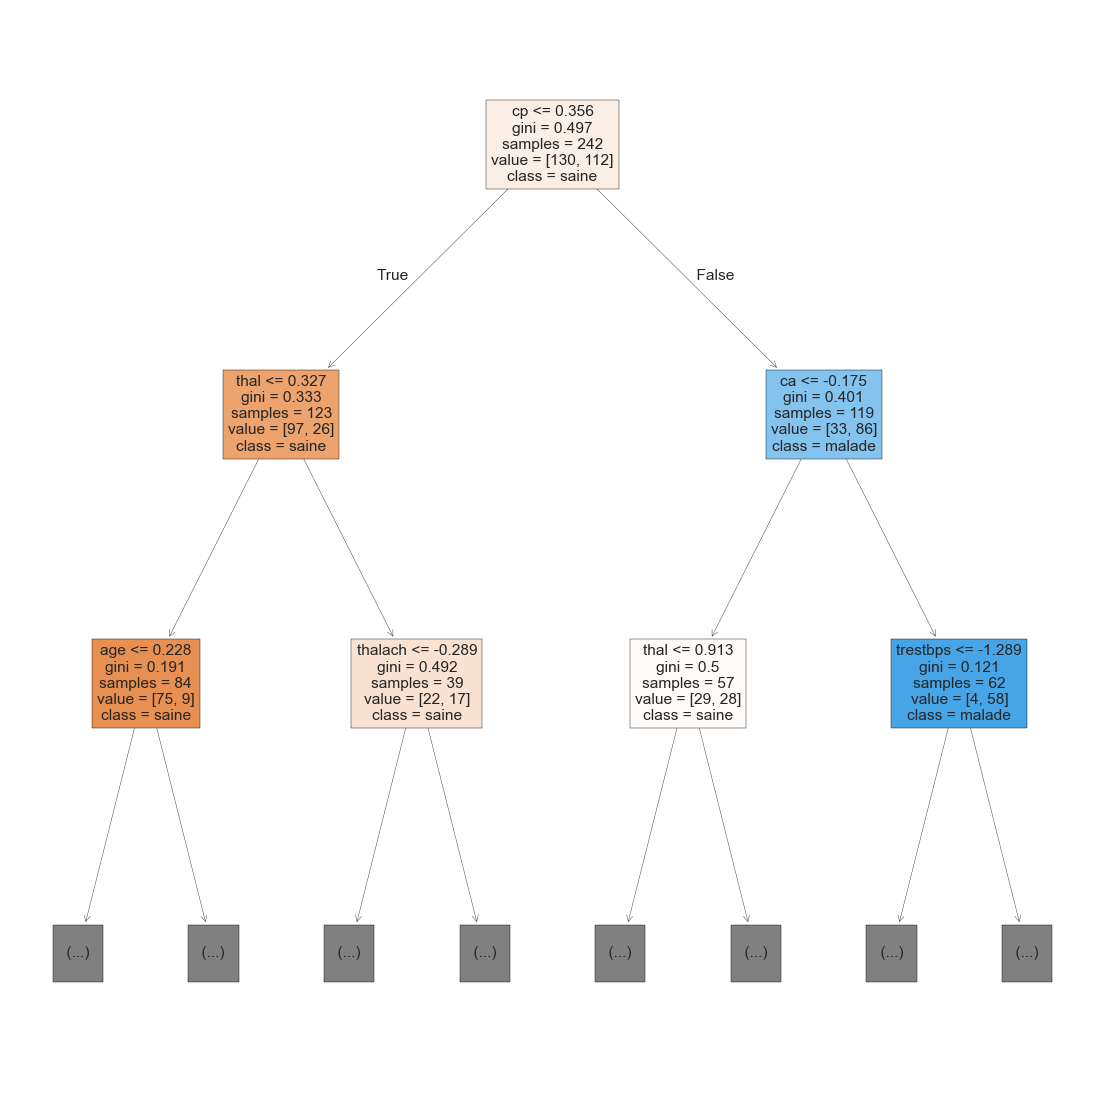

In [158]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize'] = 14, 14

best_tree = tree.DecisionTreeClassifier().fit(X_train, y_train) 
tree.plot_tree(best_tree, 
               max_depth=2, 
               feature_names=X_train.columns,  
               filled=True,
               class_names=['saine',  'malade']);

plt.savefig('decision_tree1911.png', bbox_inches="tight")

## Voting Classifier


#En bref, la sagesse de la foule est l'idée qu'un grand nombre d'amateurs peut mieux répondre à une question qu'un seul expert.


Ces techniques d'ensemble permettent de combiner plusieurs modèles pour améliorer les performances globales. Nous allons explorer le Voting Classifier, le Bagging, le Boosting et le Stacking, qui sont des méthodes populaires pour améliorer les résultats.

Le Voting Classifier combine plusieurs modèles (par exemple, régression logistique, SVM, arbres de décision) et prédit en fonction du vote majoritaire ou de la moyenne des prédictions. Cela permet d'améliorer la robustesse du modèle en utilisant plusieurs algorithmes différents.

In [163]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [164]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.8032786885245902
DecisionTreeClassifier 0.8360655737704918
KNeighborsClassifier 0.8032786885245902
VotingClassifier 0.8524590163934426


Le Voting Classifier combine plusieurs algorithmes pour prédire la classe d'un échantillon en prenant la moyenne des probabilités (soft voting). L'accuracy du Voting Classifier sera affichée

## Bagging


Le Bagging (Bootstrap Aggregating) est une technique qui consiste à entraîner plusieurs versions d'un modèle sur des sous-échantillons de données tirées avec remplacement. Ensuite, les prédictions des modèles sont combinées pour améliorer la stabilité et réduire la variance.

In [168]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Utiliser 'estimator' au lieu de 'base_estimator'
model = BaggingClassifier(estimator=KNeighborsClassifier(),
                          n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

Le Bagging Classifier est entraîné avec 100 arbres de décision, et l'accuracy sur le test set est affichée.



In [170]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8852459016393442

## Boosting


Le Boosting est une méthode d'ensemble qui construit des modèles de manière séquentielle, chaque modèle essayant de corriger les erreurs des modèles précédents. Les méthodes de Boosting populaires incluent AdaBoost et Gradient Boosting.

In [173]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.819672131147541

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
mymodel = GradientBoostingClassifier(n_estimators=100)
mymodel.fit(X_train, y_train)
mymodel.score(X_test, y_test)

0.8852459016393442

In [175]:
y_prediction=mymodel.predict(X_test) 

y_verifier=pd.DataFrame({"Expected": y_test,"predicted" :  y_prediction })
y_verifier.head(5)

,Expected,predicted
69,1,0
300,1,1
220,0,0
134,0,0
7,0,0


## Stacking


Le Stacking est une méthode d'ensemble où plusieurs modèles sont entraînés en parallèle, puis un autre modèle (méta-modèle) est utilisé pour combiner leurs prédictions. Cette approche permet d'exploiter la complémentarité des modèles.

In [178]:
from sklearn.ensemble import StackingClassifier
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7540983606557377

Le Stacking Classifier combine plusieurs modèles et utilise une régression logistique comme méta-modèle pour combiner leurs prédictions. L'accuracy est affichée.

# BUSINESS

## Courbe Precision/ Rappel

La courbe Précision / Rappel est une visualisation utile pour comprendre la balance entre ces deux métriques. Cette courbe est particulièrement importante lorsque les classes sont **déséquilibrées**.

Pour déterminer le seuil optimal (threshold) à partir d'une courbe de précision-rappel

predict_proba(X_test)[:, 1] génère les scores de probabilité pour la classe positive.
precision_recall_curve fournit les valeurs de précision, rappel, et les seuils correspondants.
Vous pouvez définir un critère pour trouver le seuil optimal (par exemple, **maximiser le F1-score**).

Optimal threshold based on maximum F1-score: 0.6


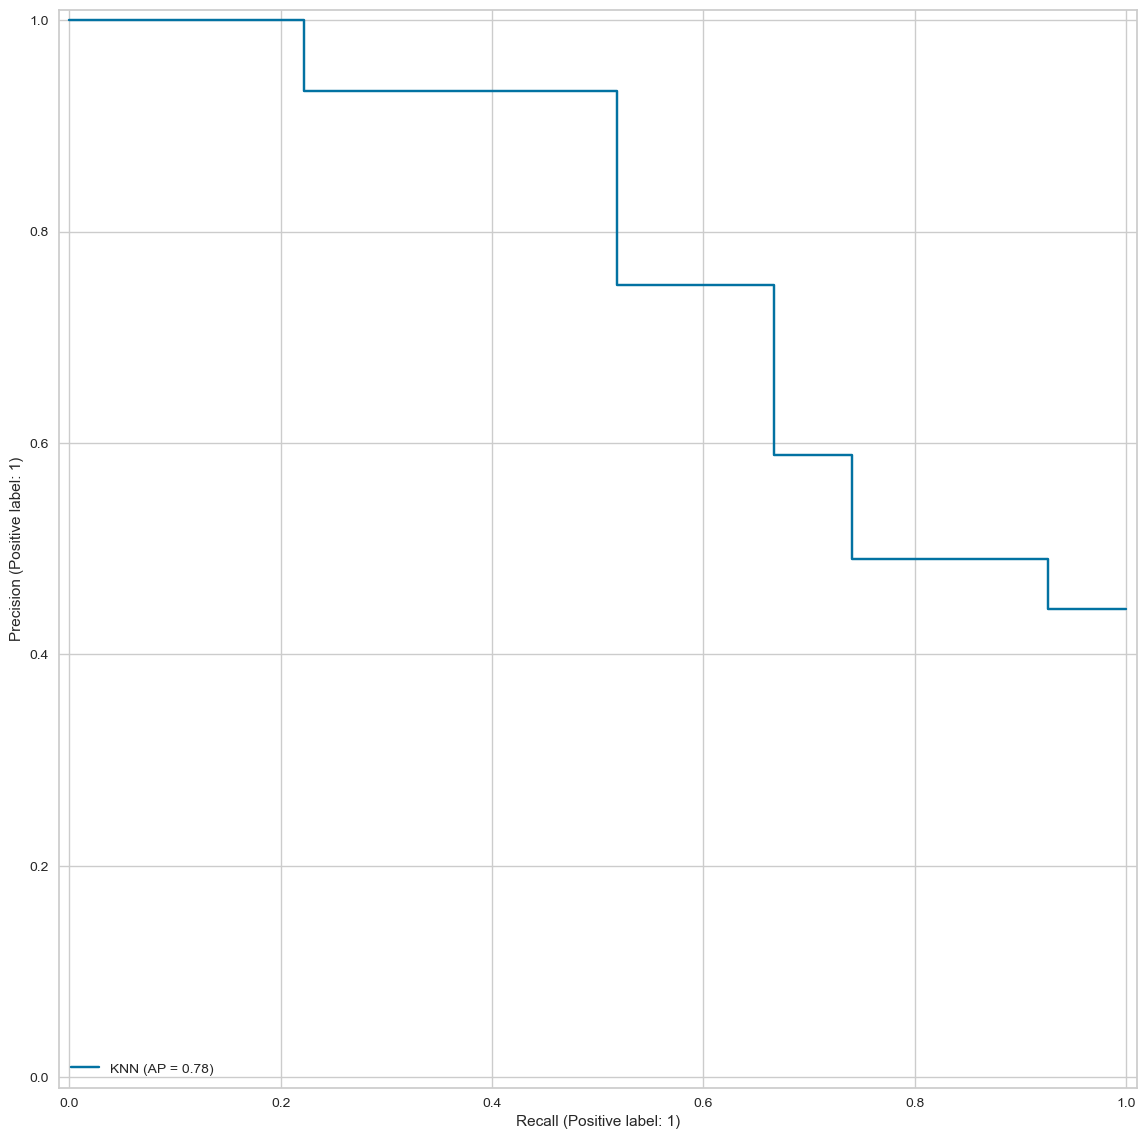

In [185]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Suppose you have predictions probabilities from your model
y_scores = model.predict_proba(X_test)[:, 1]  # Assuming a binary classification model

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Optionally plot the curve
disp = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="KNN")
#disp.plot()

# To find the threshold corresponding to the optimal point (example: maximizing F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_index = f1_scores.argmax()  # Index of maximum F1-score
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold based on maximum F1-score: {optimal_threshold}")


Le "threshold" est le point de coupure pour cette probabilité. Par défaut, dans de nombreux algorithmes, ce seuil est fixé à 0,5 (c'est-à-dire que si la probabilité qu'une observation soit positive est supérieure à 0,5, elle est classée comme positive ; sinon, elle est classée comme négative).

Dans le contexte de la courbe de précision-rappel que vous obtenez à l'aide de `sklearn` pour évaluer les performances de votre modèle de classification, **le "threshold" (ou seuil)** fait référence à la valeur à partir de laquelle votre modèle décide de classer une observation comme appartenant à la classe positive ou négative.

**Qu'est-ce que le "threshold" ?**

- Pour un modèle de classification binaire, la sortie du modèle peut être une probabilité que chaque observation appartienne à la classe positive.
- Le "threshold" est le point de coupure pour cette probabilité. Par défaut, dans de nombreux algorithmes, ce seuil est fixé à 0,5 (c'est-à-dire que si la probabilité qu'une observation soit positive est supérieure à 0,5, elle est classée comme positive ; sinon, elle est classée comme négative).

**Comment interpréter le "threshold" :**

- Si vous augmentez le seuil au-delà de 0,5, le modèle devient plus "conservateur" pour classer une observation comme positive (il faut une probabilité plus élevée pour qu'une observation soit considérée comme positive).
  - Cela **augmente la précision** (moins de faux positifs) mais peut réduire le rappel (plus de faux négatifs).
- Si vous diminuez le seuil en dessous de 0,5, le modèle devient plus "libéral" dans la classification positive.
  - Cela peut **augmenter le rappel** (moins de faux négatifs) mais diminuer la précision (plus de faux positifs).

**Comment l'utiliser :**

Pour ajuster le seuil de décision dans votre modèle en fonction de vos objectifs métier (par exemple, minimiser les faux négatifs pour des applications médicales critiques ou maximiser la précision pour réduire les coûts), vous pouvez :

1. **Analyser la courbe de précision-rappel :**
   - Utilisez les valeurs de précision et de rappel pour différents seuils afin de trouver un compromis adapté à votre cas d'usage.
   - Par exemple, si vous souhaitez maximiser le F1-score, vous pouvez trouver le seuil qui maximise cette métrique.

2. **Changer le seuil dans vos prédictions :**
   - Si vous avez trouvé que le seuil optimal est, par exemple, `0,7`, au lieu d'utiliser la valeur par défaut (0,5), vous pouvez appliquer :
     ```python
     y_pred = (model.predict_proba(X_test)[:, 1] >= 0.7).astype(int)
     ```
   - Cela signifie que le modèle classera une observation comme positive uniquement si la probabilité de la classe positive est d'au moins 0,7.

**Utilisation pratique :**
- **Cas d'usage 1 (Maximiser le rappel) :** Pour les problèmes où les faux négatifs sont coûteux, comme dans les diagnostics médicaux (ne pas manquer une maladie grave), vous pouvez choisir un seuil plus bas pour maximiser le rappel, quitte à sacrifier un peu de précision.
- **Cas d'usage 2 (Maximiser la précision) :** Si les faux positifs doivent être évités (par exemple, éviter d'envoyer des alertes inutiles), vous pouvez choisir un seuil plus élevé pour maximiser la précision.

**En résumé :** Le "threshold" est un levier permettant de faire un compromis entre la précision et le rappel en fonction de vos besoins métier. En ajustant ce seuil, vous pouvez contrôler la sensibilité et la spécificité de votre modèle de classification.

## Maximiser le bénéfice en utilisant la courbe Précision-Rappel :


Pour maximiser le bénéfice en utilisant la courbe de Précision-Rappel, vous pouvez ajuster les prédictions de votre modèle en fonction du seuil optimal qui maximise votre fonction de bénéfice, en vous basant sur les coûts et bénéfices associés aux faux négatifs (FN), faux positifs (FP), vrais positifs (VP), et vrais négatifs (VN). Voici comment procéder :

**Étapes avec la courbe de Précision-Rappel pour maximiser le bénéfice**

1. Calculez les valeurs de précision, rappel et les seuils.
2. Pour chaque seuil, calculez les FN, FP, VP, VN, et utilisez votre fonction de bénéfice pour déterminer le seuil optimal.



Optimal threshold to maximize the benefit: 0.0
Maximum benefit: 470000


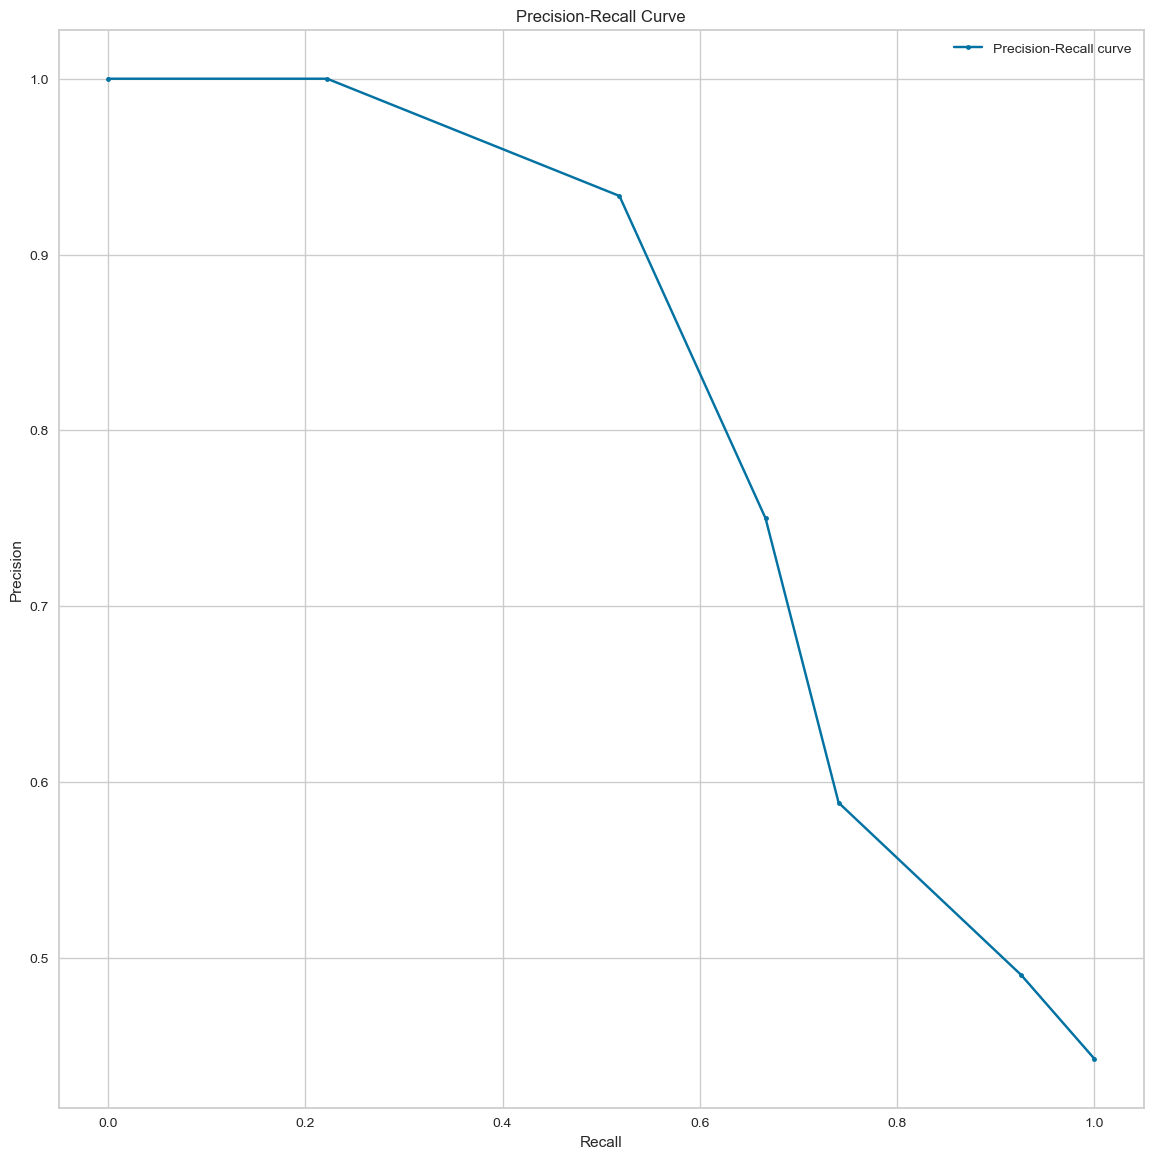

In [190]:


import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Suppose you have a trained model and test data
# y_test: true labels
# y_scores: predicted probabilities for the positive class (e.g., model.predict_proba(X_test)[:, 1])

# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Add a dummy threshold at the end for completeness (since precision_recall_curve omits the last threshold)
thresholds = np.append(thresholds, 1.0)

# Define costs and benefits
cost_fn = 50000  # Cost of a false negative
cost_fp = 10000  # Cost of a false positive
benefit_vp = 30000  # Benefit of a true positive
benefit_vn = 0  # Benefit of a true negative

benefits = []

for thresh in thresholds:
    # Predicted classes at the given threshold
    y_pred = (y_scores >= thresh).astype(int)
    
    # Calculate TP, FP, FN, TN
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    
    # Calculate benefit using your specified formula
    benefit = (benefit_vp * tp) + (benefit_vn * tn) - (cost_fn * fn) - (cost_fp * fp)
    benefits.append(benefit)

# Find the threshold that maximizes the benefit
optimal_index = np.argmax(benefits)
optimal_threshold = thresholds[optimal_index]

print(f"Optimal threshold to maximize the benefit: {optimal_threshold}")
print(f"Maximum benefit: {benefits[optimal_index]}")

# Plotting the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()





**Pourquoi utiliser la courbe de Précision-Rappel ?**
- Cette courbe est particulièrement utile lorsque vous travaillez avec des données déséquilibrées ou si vous souhaitez maximiser des métriques telles que la précision ou le rappel, ce qui peut avoir un impact direct sur votre fonction de bénéfice.

## Receiver operating characteristic ROC

La courbe ROC permet d'évaluer la performance d'un classificateur en comparant le taux de vrais positifs (rappel) et le taux de faux positifs à différents seuils de décision. L'aire sous la courbe (AUC) est une métrique globale de performance.

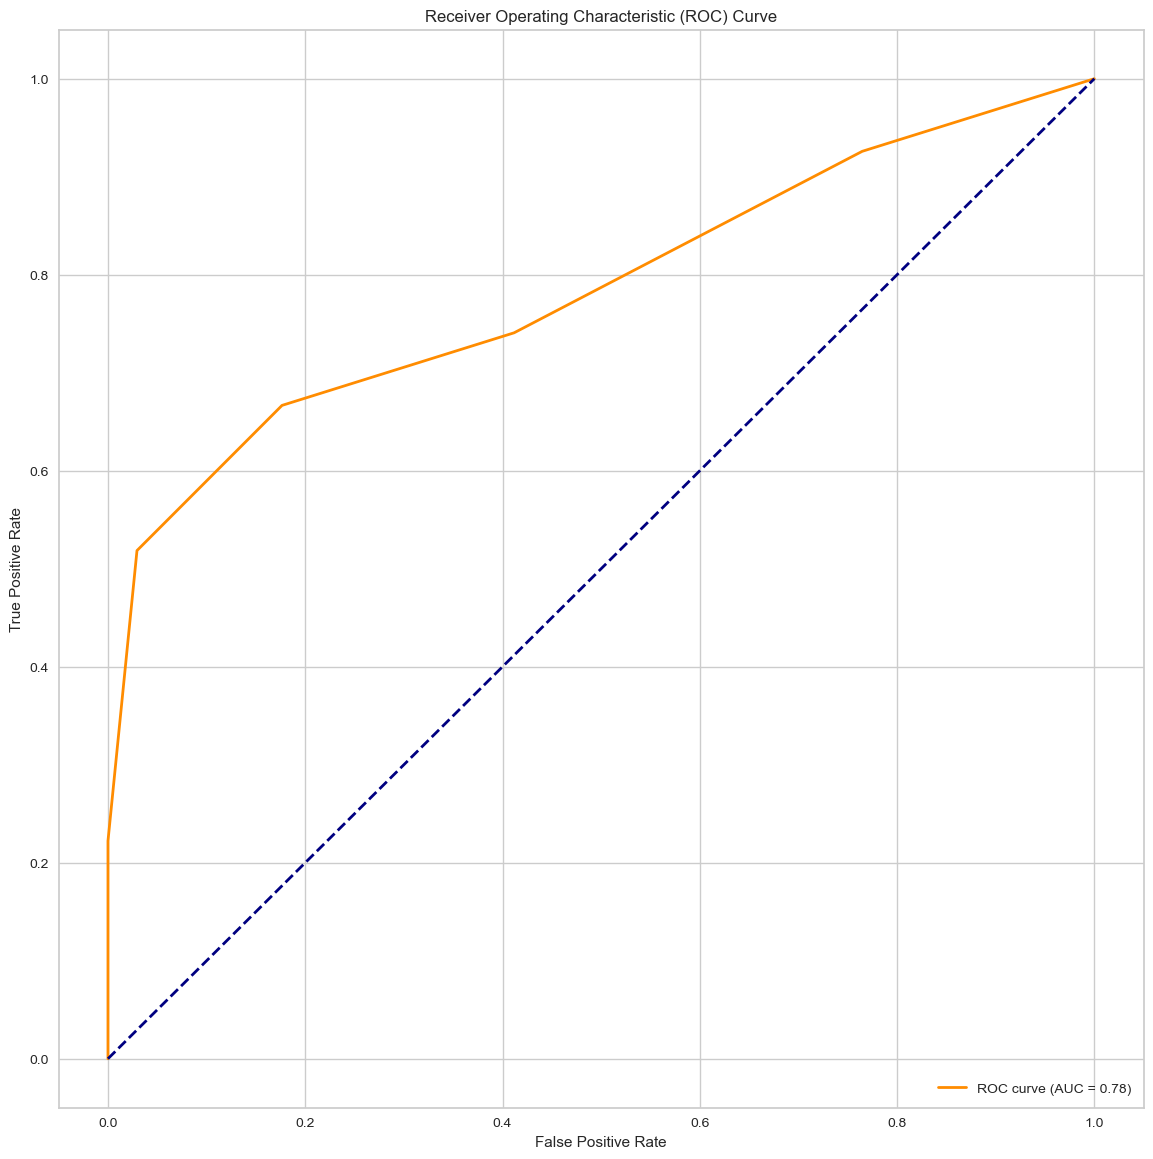

In [194]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suppose you have the true labels and predicted scores
# y_test: true labels (0 or 1 for binary classification)
# y_scores: predicted probabilities for the positive class (e.g., model.predict_proba(X_test)[:, 1])

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the area under the curve (AUC) for additional evaluation
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Maximiser le bénéfice en utilisant la courbe ROC :



In [196]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)

# Calculate FN, FP, VP, and VN for each threshold
# Assuming y_test is binary with 0 for the negative class and 1 for the positive class
benefits = []

# Define costs and benefits
cost_fn = 50000  # Cost of a false negative
cost_fp = 10000  # Cost of a false positive
benefit_vp = 30000  # Benefit of a true positive
benefit_vn = 100  # Benefit of a true negative

for thresh in roc_thresholds:
    # Predicted classes at the given threshold
    y_pred = (y_scores >= thresh).astype(int)
    
    # Calculate TP, FP, FN, TN
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    
    # Calculate benefit using your specified formula
    benefit = (benefit_vp * tp) + (benefit_vn * tn) - (cost_fn * fn) - (cost_fp * fp)
    benefits.append(benefit)

# Find the threshold that maximizes the benefit
optimal_index = np.argmax(benefits)
optimal_threshold = roc_thresholds[optimal_index]

print(f"Optimal threshold to maximize the benefit: {optimal_threshold}")
print(f"Maximum benefit: {benefits[optimal_index]}")


Optimal threshold to maximize the benefit: 0.0
Maximum benefit: 470000



## Pourquoi utiliser les deux courbes pour maximiser le bénéfice :
1. **Comparer les performances selon différents critères :**
   - La courbe **ROC** vous permet d'examiner la capacité globale du modèle à distinguer entre les classes, en se concentrant sur le compromis entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR).
   - La courbe de **Précision-Rappel** se concentre sur la précision et le rappel, ce qui est particulièrement utile si les classes sont déséquilibrées ou si l'objectif est d'optimiser des métriques spécifiques liées aux coûts/bénéfices.

2. **Choisir le seuil optimal pour maximiser le bénéfice :**
   - Vous pouvez calculer les bénéfices pour différents seuils en utilisant chaque courbe (comme nous l'avons fait dans les exemples précédents) et comparer les résultats.
   - Le seuil optimal pour maximiser le bénéfice peut être différent selon la courbe utilisée. En utilisant les deux, vous pouvez choisir celui qui offre la meilleure performance selon votre fonction de bénéfice.

3. **Cas pratique :**
   - Tracez les deux courbes (ROC et Précision-Rappel) et évaluez le bénéfice obtenu pour différents seuils.
   - Comparez le seuil et le bénéfice optimal trouvé pour chaque courbe.
   - Sélectionnez la courbe (et le seuil associé) qui offre le maximum de bénéfice selon votre fonction de coût/bénéfice.

**En résumé :**
Utiliser les deux courbes permet une approche plus complète pour optimiser vos résultats. Vous pouvez comparer les bénéfices obtenus à partir de chaque courbe et choisir celle qui vous offre le meilleur compromis selon vos priorités. Cette approche est particulièrement utile si vous avez des critères métier stricts basés sur les coûts ou si vos données présentent des caractéristiques spécifiques (comme un déséquilibre important des classes).

# DECISION

## Évaluation des modèles sans thresold

Pour effectuer une comparaison de plusieurs modèles de classification (KNN, SVM, régression logistique, Bayes naïf, Voting, Boosting, Stacking, Bagging) et afficher les métriques de précision, rappel, bénéfice, détection de surapprentissage (overfitting) et temps CPU, vous pouvez utiliser le code suivant. Il s'appuie sur des bibliothèques communes telles que `sklearn`, `numpy`, et `time` pour mesurer le temps CPU.

Voici un code pour comparer ces modèles :


In [201]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import time
import numpy as np
import pandas as pd

# Divisez votre jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir les modèles de base
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Bagging": BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50),
    "Boosting (AdaBoost)": AdaBoostClassifier(n_estimators=50),
    "Stacking": StackingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svc', SVC(probability=True))
    ], final_estimator=RandomForestClassifier()),
    "Voting": VotingClassifier(estimators=[
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression(max_iter=1000)),
        ('svc', SVC(probability=True))
    ], voting='soft')
}

# Définir une fonction pour calculer les métriques
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calcul du bénéfice
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    benefit = (30000 * tp) + (0 * tn) - (50000 * fn) - (10000 * fp)
    
    # Détection de surapprentissage (overfitting)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    overfit = "Yes" if train_score > test_score + 0.1 else "No"

    # Temps CPU
    cpu_time = end_time - start_time

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "Benefit": benefit,
        "Overfitting": overfit,
        "CPU Time (s)": cpu_time*1000
    })

In [202]:
# Affichage des résultats
results_df = pd.DataFrame(results).sort_values(by="Benefit", ascending=False)


In [203]:
results_df

,Model,Precision,Recall,Benefit,Overfitting,CPU Time (s)
7,Voting,0.859213,0.857143,810000,No,15.925407
2,Logistic Regression,0.849576,0.846154,800000,No,15.816450
6,Stacking,0.837219,0.835165,720000,No,164.613485
1,SVM,0.846154,0.846154,660000,No,15.066385
4,Bagging,0.815225,0.813187,630000,No,81.580877
0,KNN,0.824176,0.824176,570000,No,6.998777
3,Naive Bayes,0.793231,0.791209,540000,No,0.000000
5,Boosting (AdaBoost),0.736264,0.736264,210000,Yes,63.332558


## Évaluation des modèles avec thresold

Évaluation des modèles : Chaque modèle est évalué pour déterminer le seuil optimal qui maximise le bénéfice.
Sélection du meilleur modèle : Le modèle avec le bénéfice maximal est sélectionné.

In [206]:
import joblib


# Fonction d'évaluation des modèles
results = []
best_model = None
best_threshold = 0
max_benefit = -np.inf

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    global best_model, best_threshold, max_benefit
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_scores = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    thresholds = np.linspace(0, 1, 101)
    best_local_threshold = 0
    max_local_benefit = -np.inf
    best_precision = 0
    best_recall = 0
    
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_pred == 1) & (y_test == 1))
        fp = np.sum((y_pred == 1) & (y_test == 0))
        fn = np.sum((y_pred == 0) & (y_test == 1))
        tn = np.sum((y_pred == 0) & (y_test == 0))
        benefit = (30000 * tp) + (0 * tn) - (50000 * fn) - (10000 * fp)
        
        if benefit > max_local_benefit:
            max_local_benefit = benefit
            best_local_threshold = thresh
            best_precision = precision_score(y_test, y_pred, average='weighted')
            best_recall = recall_score(y_test, y_pred, average='weighted')
    
    # Détection de surapprentissage (overfitting)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    overfit = "Yes" if train_score > test_score + 0.1 else "No"

    cpu_time = (end_time - start_time) * 1000  # Temps CPU en millisecondes
    
    results.append({
        "Model": name,
        "Precision": best_precision,
        "Recall": best_recall,
        "Benefit": max_local_benefit,
        "Overfitting": overfit,
        "CPU Time (ms)": cpu_time,
        "Best Threshold": best_local_threshold
    })

    # Sauvegarder le meilleur modèle
    if max_local_benefit > max_benefit:
        best_model = model
        best_threshold = best_local_threshold
        max_benefit = max_local_benefit

# Évaluer chaque modèle
for name, model in models.items():
    evaluate_model(clone(model), X_train, y_train, X_test, y_test, name)

# Affichage des résultats
results_df = pd.DataFrame(results)



In [207]:
results_df = pd.DataFrame(results).sort_values(by="Benefit", ascending=False)
results_df

,Model,Precision,Recall,Benefit,Overfitting,CPU Time (ms),Best Threshold
6,Stacking,0.830736,0.736264,1050000,No,150.163412,0.13
2,Logistic Regression,0.805811,0.670330,990000,No,1.999140,0.09
3,Naive Bayes,0.807073,0.725275,970000,No,0.000000,0.02
1,SVM,0.794824,0.637363,960000,No,0.000000,0.09
7,Voting,0.794824,0.637363,960000,No,11.547327,0.09
4,Bagging,0.834725,0.813187,910000,No,47.348738,0.34
0,KNN,0.812529,0.780220,880000,No,2.289057,0.21
5,Boosting (AdaBoost),0.223282,0.472527,810000,Yes,56.926966,0.00


In [208]:

# le meilleur modèle et son seuil optimal
print(f"Best model {best_model} saved with a benefit of {max_benefit} and a threshold of {best_threshold}")

Best model StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('svc', SVC(probability=True))],
                   final_estimator=RandomForestClassifier()) saved with a benefit of 1050000 and a threshold of 0.13


 **Explication :**
- Chaque modèle est entraîné sur les données d'entraînement et évalué sur les données de test.
- Le bénéfice est calculé selon votre formule donnée.
- La détection de surapprentissage compare les performances sur l'ensemble d'entraînement et l'ensemble de test.
- Le temps CPU mesure le temps pris par chaque modèle pour l'entraînement et la prédiction.
- Les métriques de précision et de rappel sont pondérées pour tenir compte des classes déséquilibrées.

Ce code fournit une vue d'ensemble des performances de chaque méthode sur les aspects importants que vous avez demandés. Vous pouvez ajuster les hyperparamètres ou ajouter d'autres métriques selon vos besoins spécifiques.

Si vous observez que les seuils optimaux pour vos modèles se situent dans une plage très petite (par exemple, 0 à 0,20), plusieurs raisons peuvent l'expliquer :

**Déséquilibre des classes dans les données :**
   - Si votre ensemble de données est fortement déséquilibré (par exemple, beaucoup plus de négatifs que de positifs), les modèles de classification peuvent produire des probabilités biaisées vers la classe majoritaire. Cela signifie qu'il faut abaisser le seuil pour capturer un nombre suffisant de vrais positifs et améliorer le rappel.

**Modèles peu sûrs de leurs prédictions :**
   - Si les modèles génèrent des probabilités de prédiction proches de 0,5 (c'est-à-dire une faible confiance dans les prédictions), il peut être nécessaire d'abaisser le seuil pour détecter plus de vrais positifs, même au coût d'augmenter les faux positifs. Cela peut indiquer que le modèle ne distingue pas bien entre les classes.

**Fonction de coût/bénéfice spécifique :**
   - Votre fonction de coût/bénéfice accorde un coût très élevé aux faux négatifs (50 000€) par rapport aux faux positifs (10 000€). Cela peut pousser les modèles à choisir des seuils plus bas pour minimiser les faux négatifs autant que possible, même si cela entraîne davantage de faux positifs. Le modèle essaie de maximiser votre bénéfice en augmentant le rappel, ce qui est souvent atteint en abaissant le seuil.

**Données bruitées ou modèle mal adapté :**
   - Si vos données contiennent beaucoup de bruit ou si le modèle choisi n'est pas bien adapté à la complexité des données, il peut produire des scores de probabilité peu discriminants. Cela conduit à des seuils faibles pour maximiser les bénéfices.

**Distribution des probabilités de sortie :**
   - Si les probabilités de sortie du modèle sont fortement concentrées dans une petite plage (par exemple, la plupart des valeurs sont autour de 0,1 ou 0,2), un seuil bas sera nécessaire pour différencier les prédictions positives des négatives.

**Effet du choix des métriques de maximisation :**
   - En maximisant spécifiquement une fonction de coût/bénéfice, vous ajustez le modèle pour favoriser la détection de la classe positive. Cela peut pousser le modèle à abaisser son seuil pour maximiser le nombre de vrais positifs (même au détriment de la précision).

**Ce que vous pouvez vérifier :**
- **Distribution des scores de prédiction** : Visualisez la distribution des probabilités prédites par votre modèle (`y_scores`). Si la majorité des scores sont bas, cela peut expliquer pourquoi les seuils optimaux sont faibles.
- **Balance des classes** : Vérifiez si vos classes sont déséquilibrées. Si c'est le cas, vous pourriez envisager des techniques de rééchantillonnage ou de pondération pour équilibrer les prédictions.
- **Réajuster la fonction de coût/bénéfice** : Si la minimisation des faux négatifs a un coût trop élevé, vous pourriez envisager d'ajuster les poids dans la fonction de bénéfice pour obtenir un meilleur équilibre.

En résumé, les seuils bas indiquent que votre modèle favorise le rappel (capturer les vrais positifs) pour maximiser le bénéfice, probablement en raison de la fonction de coût/bénéfice que vous avez spécifiée ou d'un déséquilibre des classes.

## Sauvegarde du modèle 

Après avoir entraîné un modèle, il est important de pouvoir le sauvegarder pour le réutiliser ultérieurement sans avoir à le réentraîner. On utilise généralement la bibliothèque joblib ou pickle pour sauvegarder un modèle.

In [213]:
# Sauvegarder le meilleur modèle et son seuil optimal
joblib.dump({"model": best_model, "threshold": best_threshold}, "best_model.pkl")

['best_model.pkl']

Le modèle est sauvegardé dans un fichier final_model.pkl sur le disque, ce qui permet de le charger ultérieurement pour des prédictions sans avoir besoin de le réentraîner.

## Utiliser un modèle sauvegardé 

Nous pouvons charger un modèle sauvegardé pour l'utiliser directement pour des prédictions sur de nouvelles données. Cela permet de déployer le modèle en production.

In [217]:
loaded = joblib.load("best_model.pkl")
best_model = loaded["model"]
best_threshold = loaded["threshold"]

# Pour utiliser le modèle avec le seuil optimal
y_scores = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
y_pred = (y_scores >= best_threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1])

## Tester le modèle avec de nouvelles donnees

Une fois que le modèle est entraîné et sauvegardé, nous pouvons le tester avec de nouvelles données pour évaluer ses performances en conditions réelles. Cela implique de prendre de nouveaux échantillons de données et de générer des prédictions.

In [220]:
X_test.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,-0.159199,0.685069,-0.164995,-0.096011,-0.013386,2.390484,1.015005,1.022633,-0.69548,-0.895381,-0.97474,2.500744,-0.897038


In [221]:
# Création d'un dictionnaire pour un nouveau client
monclient_dict = {
    'age': 22.0,
    'sex': 1.0,
    'cp': 145.0,
    'trestbps': 233.0,
    'chol': 1.0,
    'fbs': 2.0,
    'restecg': 300.0,
    'thalach': 0.0,
    'exang': 2.3,
    'oldpeak': 3.0,
    'slope': 0.0,
    'ca': 6.0,
    'thal': 1.0
}

# Conversion en DataFrame
monclient = pd.DataFrame([monclient_dict])

# Transposition du DataFrame pour affichage plus lisible
monclient


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,22.0,1.0,145.0,233.0,1.0,2.0,300.0,0.0,2.3,3.0,0.0,6.0,1.0


In [222]:
X_test.shape,monclient.shape

((91, 13), (1, 13))

In [223]:
fictional_df = monclient

In [224]:
# Pour utiliser le modèle avec le seuil optimal
y_scores = best_model.predict_proba(fictional_df)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
y_prediction_proba = y_scores 
y_prediction_class = (y_scores >= best_threshold).astype(int)

y_prediction_proba,y_prediction_class

(array([0.78]), array([1]))

In [225]:
# get average survival rate to compare to prediction values
average_rate = np.mean(y) * 100
print('Average probability of negative twitter: %.2f percent' % average_rate)


Average probability of negative twitter: 45.87 percent


In [226]:
probability_of_fictional = 100*y_prediction_proba[0]
probability_of_fictional


78.0

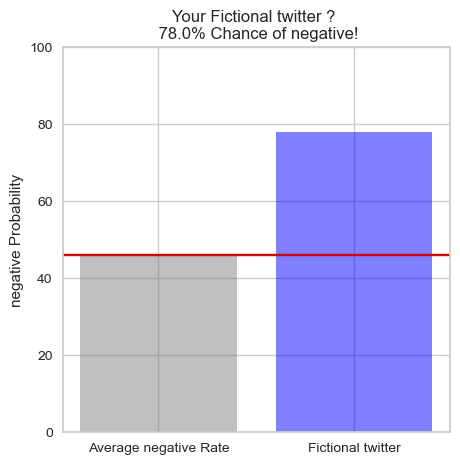

In [227]:
fig = plt.figure(figsize=(5,5));

objects = ('Average negative Rate', 'Fictional twitter')
y_pos = np.arange(len(objects))
performance = [average_rate, probability_of_fictional]
 
ax = fig.add_subplot(111)
colors = ['gray', 'blue']
plt.bar(y_pos, performance, align='center', color = colors, alpha=0.5)
plt.xticks(y_pos, objects)
plt.axhline(average_rate, color="r")
plt.ylim([0,100])
plt.ylabel('negative Probability')
plt.title('Your Fictional twitter ? \n ' + str(round(probability_of_fictional,2)) + '% Chance of negative!')
 
plt.show()


Le modèle générera une prédiction pour un nouvel échantillon de données. Par exemple, il peut prédire si un patient est atteint de maladie cardiaque (1) ou non (0)

## Téléversement (robot), Déploiement(web)

Le déploiement du modèle consiste à rendre le modèle disponible pour des utilisateurs finaux via une API ou une interface web. Cela peut être réalisé à l'aide de frameworks comme Flask ou Streamlit.

## Audit, biais et équité